In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#list_names = ['User1', 'User3','User4', 'User5', 'User6']#, 'User7']
list_names = ['User1', 'User3', 'User4', 'User5', 'User6', 'User7', 'User8']#,'User4', 'User5', 'User6']#, 'User7']
#list_names = ['User3', 'User3']

nbUsers = len(list_names)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

addword = 'AllTimes-3sBIndexThumb'

In [2]:
nbUsers

7

In [3]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [4]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+ addword+ '.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [5]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [6]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 250):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(6, 10, 3):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()
            
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'STDPhalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].std()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'STDBoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].std()
            
            
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Speed.'+str(j)] = abs(globalAnalysis[cond]['Speed.'+str(j)].mean())

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [7]:
meanUsers.head()

Beta  BoneDist.6  BoneDist.9  Gamma  Phalanx.6  Phalanx.9  \
2580  1.05  123.486648  141.442734    0.0  24.054179  18.558197   
2570  1.05  123.767080  138.041744    0.0  25.715584  19.443839   
2560  1.05  129.597154  141.647252    0.0  25.628388  20.668474   
2550  1.05  124.821874  139.286265    0.0  26.167948  19.880196   
2540  1.05  131.576441  144.413420    0.0  25.407317  18.773877   

      STDBoneDist.6  STDBoneDist.9  STDPhalanx.6  STDPhalanx.9    Speed.6  \
2580      24.008933      40.542520      7.672328      7.683211   8.175861   
2570      23.402454      37.845085      7.978118      6.621249   7.485026   
2560      28.629766      38.605966      8.640390      6.696421  33.265965   
2550      22.182111      35.737082      9.339359      6.319306   6.116862   
2540      36.941538      37.985116      8.973879      6.239159   9.448139   

        Speed.9  
2580  37.997788  
2570   0.794373  
2560  27.968647  
2550   5.133701  
2540  18.060091

In [8]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 150):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [9]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [10]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.100  DistBoneInTolTime.1000  \
0       0                  0.0                5.91805                43.30315   
1       1                  0.0                3.77795                36.85865   
2       2                  0.0                1.52065                13.81480   
3       3                  0.0                2.87600                32.27430   
4       4                  0.0                2.01835                57.59555   

   DistBoneInTolTime.1010  DistBoneInTolTime.1020  DistBoneInTolTime.1030  \
0                43.30315                45.61405                45.61405   
1                40.09035                41.17445                41.17445   
2                17.26170                15.90730                15.90730   
3                32.27430                32.27430                34.70760   
4                59.54170                59.54170                61.86140   

   DistBoneInTolTime.1040  DistBoneInTolTime.1050  DistBoneInTolTime.1060  \
0                42.91675                42.91675                40.94345   
1                41.17445                41.17445                43.19050   
2                15.90730                15.90730                14.16175   
3                34.70760                34.70760                34.70760   
4                60.36280                60.36280                60.36280   

   ...  Speed.920  Speed.930  Speed.940  Speed.950  Speed.960  Speed.970  \
0  ...  12.304000     12.304     12.304        NaN        NaN        NaN   
1  ... -10.367143        NaN        NaN        NaN        NaN   7.032857   
2  ...        NaN        NaN        NaN        NaN        NaN        NaN   
3  ...        NaN        NaN        NaN        NaN        NaN        NaN   
4  ...        NaN        NaN        NaN        NaN        NaN        NaN   

   Speed.980  Speed.990       Task   User  
0        NaN  12.292127      Touch  User8  
1   7.032857   7.032857      Raise  User8  
2        NaN        NaN       Pull  User8  
3        NaN        NaN       Push  User8  
4  17.692273  17.692273  Push Down  User8  

[5 rows x 1190 columns]

In [11]:
#Mean per config, All users?

In [12]:
meanPerScale.tail()

Beta  Gamma     large    medium     small
130  1.05    0.0  2.329811  4.854586  3.281889
120  1.05    0.0  2.397653  4.531500  3.233763
110  1.05    0.0  2.200179  4.294031  2.685606
100  1.05    0.0  2.250460  3.877928  2.350321
0    1.05    0.0  2.090399  3.064065  2.277221

In [13]:
globalAnalysis

Beta  BoneDist.6  BoneDist.9  DistToPred.6  DistToPred.9  Gamma  \
Tolerance                                                                    
0          1.05    0.000000    0.000000     11.149509     10.707657    0.0   
100        1.05    4.204634    3.206289     12.088397     11.165436    0.0   
110        1.05    4.599019    3.362024     11.978162     11.495214    0.0   
120        1.05    5.468817    4.004038     11.646006     11.250751    0.0   
130        1.05    5.473073    4.970971     12.279443     11.168604    0.0   
140        1.05    5.651586    5.998000     12.371597     11.013133    0.0   
150        1.05    5.548252    6.300225     12.750847     11.055004    0.0   
160        1.05    6.546405    6.667261     12.622359     11.292191    0.0   
170        1.05    6.929896    6.780476     12.534099     11.650367    0.0   
180        1.05    8.338513    6.773294     12.761717     11.820383    0.0   
190        1.05    7.642512    7.182220     13.079399     12.338170    0.0   
200        1.05    8.710680    7.763201     13.094965     12.404192    0.0   
210        1.05    9.132324    8.165550     12.850189     12.948557    0.0   
220        1.05    9.472740    8.877993     13.236181     13.452014    0.0   
230        1.05    9.596079    9.630103     13.302931     14.583374    0.0   
240        1.05   11.223176   10.712344     13.985177     15.245409    0.0   
250        1.05   10.777412   10.728364     14.864350     15.659685    0.0   
260        1.05   11.493530   10.460802     15.621882     15.615573    0.0   
270        1.05   10.962325   10.782741     15.925182     15.905328    0.0   
280        1.05   11.507347   11.712027     16.476669     16.347199    0.0   
290        1.05   12.410151   11.989739     17.495392     17.305037    0.0   
300        1.05   13.123460   12.270310     18.800858     18.436206    0.0   
310        1.05   13.584128   14.133696     22.154096     20.227069    0.0   
320        1.05   13.082009   14.234776     21.499547     20.885013    0.0   
330        1.05   14.500311   12.866601     24.083621     21.957300    0.0   
340        1.05   14.382219   13.999546     24.493121     22.420820    0.0   
350        1.05   15.926006   14.594436     24.894240     23.294752    0.0   
360        1.05   17.020783   13.481370     26.070080     23.962122    0.0   
370        1.05   17.927170   14.529747     27.165569     24.398013    0.0   
380        1.05   17.277481   15.674151     28.175047     24.833958    0.0   
...         ...         ...         ...           ...           ...    ...   
2750       1.05  152.258484  187.042983    270.228239    457.282057    0.0   
2760       1.05  157.883093  188.244052    283.633366    455.197658    0.0   
2770       1.05  168.924004  218.239481    293.180578    485.176074    0.0   
2780       1.05  181.621386  217.371910    299.227788    481.643832    0.0   
2790       1.05  179.821108  224.565186    307.709148    498.740400    0.0   
2800       1.05  172.242425  218.020995    298.330021    486.286302    0.0   
2810       1.05  156.921613  212.363538    286.937220    504.281350    0.0   
2820       1.05  159.830232  199.690826    288.452482    474.703797    0.0   
2830       1.05  155.782571  179.312310    315.165212    458.774311    0.0   
2840       1.05  169.690942  170.368344    324.448292    457.582067    0.0   
2850       1.05  161.737879  176.366625    308.425267    464.409159    0.0   
2860       1.05  171.140096  174.173780    336.499546    469.600966    0.0   
2870       1.05  168.368720  181.524521    327.939123    478.608329    0.0   
2880       1.05  177.602404  204.869445    332.011849    512.949153    0.0   
2890       1.05  154.130215  205.941919    297.409703    459.802678    0.0   
2900       1.05  160.130980  199.994247    308.615096    481.544116    0.0   
2910       1.05  164.813883  210.128665    307.488237    453.304761    0.0   
2920       1.05  166.594638  197.729309    328.117152    464.063118    0.0   
2930       1.05  148.030073  178.

In [14]:
analysisPerTask.head()

Beta  Gamma      Pull      Push  Push Down     Raise  Tolerance  \
Tolerance                                                                    
0          1.05    0.0  0.755216  0.429882   0.307157  0.422433          0   
100        1.05    0.0  1.507341  1.027185   1.364446  2.173115        100   
110        1.05    0.0  1.021467  1.027985   1.731009  2.470996        110   
120        1.05    0.0  1.420149  0.597037   0.894552  1.529363        120   
130        1.05    0.0  1.824637  0.610124   1.265462  2.475472        130   

              Touch   User  
Tolerance                   
0          0.582051  User8  
100        0.643524  User8  
110        0.629607  User8  
120        0.204982  User8  
130        0.493692  User8

In [15]:
globalAnalysis.iloc[1]

Beta                   1.05
BoneDist.6          4.20463
BoneDist.9          3.20629
DistToPred.6        12.0884
DistToPred.9        11.1654
Gamma                     0
GraspDuration.6         NaN
GraspDuration.9         NaN
Phalanx.6           1.37784
Phalanx.9           1.19265
Speed.6           -0.853891
Speed.9             11.4382
Tolerance               100
User                  User8
Name: 100, dtype: object

In [16]:
tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(6, 10, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(6, 10, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal




In [17]:
for user in range(0, nbUsers):
    cond = globalAnalysis['User'] == list_names[user]
    globalAnalysis.loc[cond, 'R-FingerTips'] = globalAnalysis[cond]['R-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'R-BonesFingerTips'] = globalAnalysis[cond]['R-BonesFingerTips_'+str(list_names[user])]
    
    

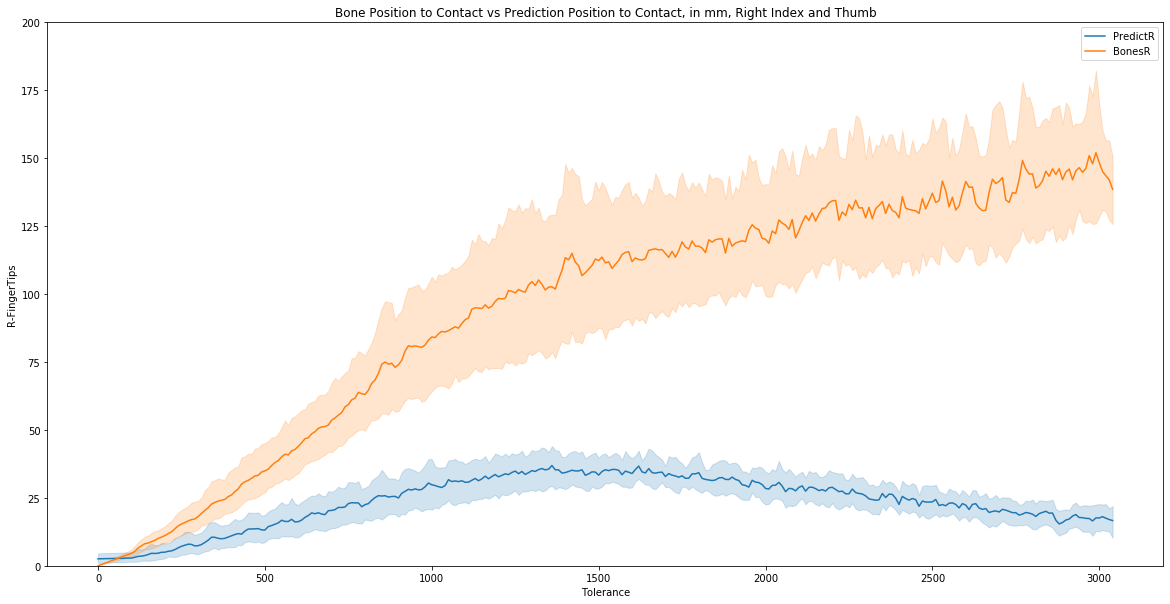

In [18]:
plt.figure(figsize = (20, 10))
#for user in range(0, nbUsers):
#    cond = (globalAnalysis['User'] == list_names[user])

sns.lineplot( x = 'Tolerance', y = 'R-FingerTips', data = globalAnalysis, label = 'PredictR')#+str(list_names[user]))
sns.lineplot( x = 'Tolerance', y = 'R-BonesFingerTips', data = globalAnalysis, label = 'BonesR')#+str(list_names[user]))

#sns.lineplot( x = 'Tolerance', y = 'L-FingerTips', data = globalAnalysis, label = 'PredictL')#+str(list_names[user]))
#sns.lineplot( x = 'Tolerance', y = 'L-BonesFingerTips', data = globalAnalysis, label = 'BonesL')#+str(list_names[user]))
plt.title('Bone Position to Contact vs Prediction Position to Contact, in mm, Right Index and Thumb')
plt.ylim(0,200)
plt.legend()

plt.savefig('./IndexThumbPredvsBones.pdf')

In [19]:
globalAnalysis[(globalAnalysis['R-FingerTips'] <= 25) & (globalAnalysis['Tolerance'] <= 1500)]['R-FingerTips']

Tolerance
0       0.472192
100     1.285242
110     1.293087
120     0.914139
130     1.317546
140     1.479057
150     1.460639
160     1.794246
170     2.016106
180     1.759693
190     1.846973
200     2.479564
210     2.819164
220     2.695385
230     2.718974
240     2.683477
250     2.591288
260     2.955012
270     3.160707
280     4.093789
290     4.260789
300     3.808045
310     3.801189
320     3.859691
330     4.406601
340     4.892331
350     5.761420
360     5.042647
370     5.493657
380     5.172662
         ...    
740    23.552458
0       8.512468
100     8.557508
110     9.698674
120    11.149564
130    10.267237
140    10.798765
150    12.754758
160    14.758464
170    13.137651
180    12.662269
190    14.246485
200    14.029698
210    13.697549
220    14.702686
230    17.058192
240    17.979452
250    18.320351
260    19.950416
270    20.141532
280    19.278363
290    18.960163
300    19.902508
310    19.460856
320    22.399217
350    24.911651
360    24.415523
370 

In [20]:
meanUsers.head()

Beta  BoneDist.6  BoneDist.9  Gamma  Phalanx.6  Phalanx.9  \
2580  1.05  123.486648  141.442734    0.0  24.054179  18.558197   
2570  1.05  123.767080  138.041744    0.0  25.715584  19.443839   
2560  1.05  129.597154  141.647252    0.0  25.628388  20.668474   
2550  1.05  124.821874  139.286265    0.0  26.167948  19.880196   
2540  1.05  131.576441  144.413420    0.0  25.407317  18.773877   

      STDBoneDist.6  STDBoneDist.9  STDPhalanx.6  STDPhalanx.9    Speed.6  \
2580      24.008933      40.542520      7.672328      7.683211   8.175861   
2570      23.402454      37.845085      7.978118      6.621249   7.485026   
2560      28.629766      38.605966      8.640390      6.696421  33.265965   
2550      22.182111      35.737082      9.339359      6.319306   6.116862   
2540      36.941538      37.985116      8.973879      6.239159   9.448139   

        Speed.9  
2580  37.997788  
2570   0.794373  
2560  27.968647  
2550   5.133701  
2540  18.060091

In [21]:
analysisPerScale.index[:3300]

Int64Index([   0,  100,  110,  120,  130,  140,  150,  160,  170,  180,
            ...
            2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040],
           dtype='int64', name='Tolerance', length=2072)

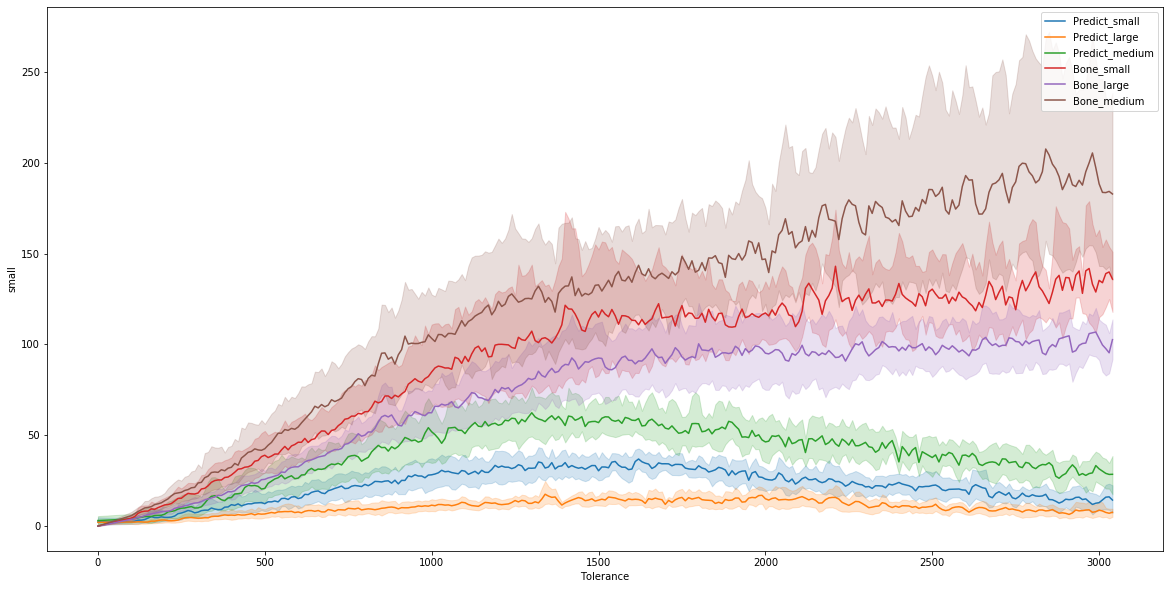

In [22]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisPerScale[:3300], label = 'Predict_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisPerScale[:3300], label = 'Predict_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisPerScale[:3300], label = 'Predict_medium')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisBoneDistPerScale[:3300], label = 'Bone_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisBoneDistPerScale[:3300], label = 'Bone_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisBoneDistPerScale[:3300], label = 'Bone_medium')


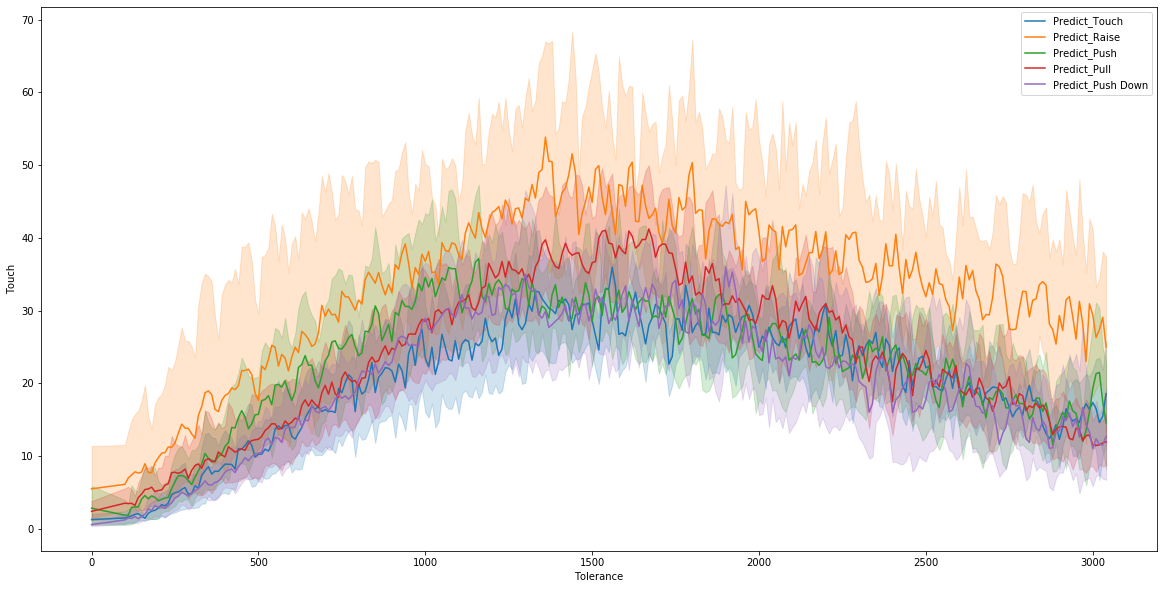

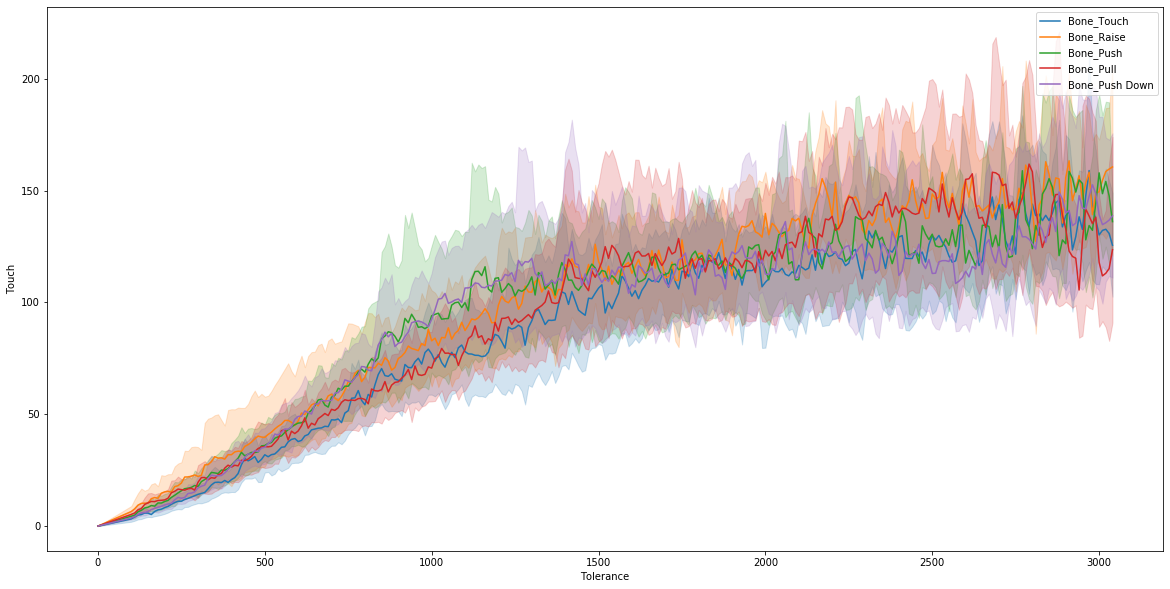

In [23]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')




In [24]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.100  DistBoneInTolTime.1000  \
0       0                  0.0                5.91805                43.30315   
1       1                  0.0                3.77795                36.85865   
2       2                  0.0                1.52065                13.81480   
3       3                  0.0                2.87600                32.27430   
4       4                  0.0                2.01835                57.59555   

   DistBoneInTolTime.1010  DistBoneInTolTime.1020  DistBoneInTolTime.1030  \
0                43.30315                45.61405                45.61405   
1                40.09035                41.17445                41.17445   
2                17.26170                15.90730                15.90730   
3                32.27430                32.27430                34.70760   
4                59.54170                59.54170                61.86140   

   DistBoneInTolTime.1040  DistBoneInTolTime.1050  DistBoneInTolTime.1060  \
0                42.91675                42.91675                40.94345   
1                41.17445                41.17445                43.19050   
2                15.90730                15.90730                14.16175   
3                34.70760                34.70760                34.70760   
4                60.36280                60.36280                60.36280   

   ...  Speed.920  Speed.930  Speed.940  Speed.950  Speed.960  Speed.970  \
0  ...  12.304000     12.304     12.304        NaN        NaN        NaN   
1  ... -10.367143        NaN        NaN        NaN        NaN   7.032857   
2  ...        NaN        NaN        NaN        NaN        NaN        NaN   
3  ...        NaN        NaN        NaN        NaN        NaN        NaN   
4  ...        NaN        NaN        NaN        NaN        NaN        NaN   

   Speed.980  Speed.990       Task   User  
0        NaN  12.292127      Touch  User8  
1   7.032857   7.032857      Raise  User8  
2        NaN        NaN       Pull  User8  
3        NaN        NaN       Push  User8  
4  17.692273  17.692273  Push Down  User8  

[5 rows x 1190 columns]

In [25]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig['AbsSpeed.0'] = abs(allConfig['Speed.0'])

for tol in range(100, 3050, 10):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig['AbsSpeed.'+str(tol)] = abs(allConfig['Speed.'+str(tol)])

In [26]:
speedTol = pd.DataFrame()
i = 0
speedTol.loc[0, 'AbsSpeed'] = allConfig['AbsSpeed.0'].dropna().mean()
for user in range(0, nbUsers):
    cond = allConfig['User'] == list_names[user]
    speedTol.loc[0, list_names[user]] = allConfig[cond]['AbsSpeed.0'].dropna().mean()
    for tol in range(300, 2050, 50):
        speedTol.loc[tol, 'AbsSpeed'] = allConfig['AbsSpeed.'+str(tol)].dropna().mean()
        speedTol.loc[tol, list_names[user]] = allConfig[cond]['AbsSpeed.'+str(tol)].dropna().mean()
    
    

In [27]:
speedTol

AbsSpeed       User1       User3       User4       User5       User6  \
0       7.393307   13.577727    6.646985    8.470570    8.350093    4.890196   
300    11.056585   53.410198   62.271751   16.478497   28.346498    0.401985   
350    40.626898   50.657118   41.114343   31.394155   75.001341   25.113577   
400    24.201790  105.068772   30.978052  142.335439   32.704787    0.373181   
450    12.490651   46.162870   27.522289    0.657589   31.061202   27.328539   
500    59.363586   79.481839   53.408163   75.019957   31.508912   58.784270   
550    55.846507   96.522479   24.486051   35.270423   52.488559   27.669483   
600    16.951462   92.005861   49.101025   53.850527    0.066760   24.594725   
650    58.700284  105.150374   30.465378   37.837538   38.251875   26.490785   
700    20.351635   94.431505   77.946554   55.866454    0.012445   20.123663   
750    72.773556  147.703595   48.413249   34.800764   62.343878   27.836048   
800    37.473426  228.908189   19.224853   49.122734    0.082824   26.342662   
850    19.708666   61.220314    1.540775   43.604378   76.715346   43.975838   
900    42.692129  236.004701   69.502670   30.597629    1.507208   22.847033   
950   147.286507  338.413821   25.838211   48.417465   77.246390   32.277369   
1000   28.531721   99.087987  114.370476   85.968586  126.984703    0.870341   
1050   46.298745  195.229921   50.653118   31.599974    0.728896   30.758620   
1100   11.011866   88.383298    0.435621   43.405927    0.705394   51.732941   
1150   90.003439  127.890145   41.770962   67.466092   25.343776  100.364173   
1200  107.492489  202.786239   70.303221   42.725501   64.328450   16.540860   
1250  161.037493  326.393738   49.026508   48.251458  132.496404   19.517781   
1300  103.726280  220.761087   44.616788   39.558089   72.075556   66.279479   
1350   50.893458   82.972587   29.839398   39.256801   54.403733   28.223062   
1400   53.099029  290.416424    0.630525   14.926678   25.371616   41.986598   
1450   79.914073  159.780990    6.730402  107.364041   87.409891   26.970749   
1500   39.992673  308.955155    9.015141   33.824652    0.000000   44.757740   
1550   20.775209  119.717812   93.432658   41.531408    0.137711   20.723526   
1600   18.904428   87.989354   70.619755   14.619358    0.401714   69.500974   
1650    7.072311   59.609728    0.008962  133.830745    0.570766   17.707977   
1700   27.840582  157.683673   31.422896   79.657766    0.000000  100.929564   
1750   19.113780  132.697200    0.094643   42.524456   24.171985   14.554153   
1800   40.590879  369.074279   29.781340    0.532909   52.377791   59.106253   
1850   11.759193  125.836889    0.000000   91.293449    0.115594   41.500280   
1900   60.009473  428.499444   18.726113    0.236443   90.683411   52.144925   
1950   47.676384  419.981809   13.977203   15.426541  174.695289  174.192512   
2000   17.799659  142.406448    0.136490    0.598205   78.676099   65.988491   

           User7       User8  
0       4.938187    4.506852  
300    10.563697   37.796486  
350    34.678280   11.881612  
400    10.386227   24.789843  
450    20.635157   13.178092  
500    18.131227   26.429705  
550    33.987643   21.402604  
600    44.711278   19.154145  
650    40.158332   23.844686  
700    27.417618   13.262320  
750    30.256543   13.892267  
800    21.783007   26.375743  
850    68.532185   14.258167  
900    33.581868   32.834641  
950    27.580189   12.933054  
1000   27.660317   60.922784  
1050   25.386905  237.792659  
1100   23.505172   28.142322  
1150   83.650771   29.900328  
1200   45.015813   33.929413  
1250   78.019985   50.937892  
1300   57.984589   18.412407  
1350   35.323606   34.830276  
1400   69.650343   24.214554  
1450   32.844739   44.485447  
1500    8.172550  103.576804  
1550   41.481934   45.001819  
1600  141.245090   46.993774  
1650   48.435858   50.811276  
1700   97.802756   29.582458  
1750   11.181749   50.681879  
1800   47.767582  119.098367  
1850   27.597149   52.59

In [28]:
analysisPerTask.head()

Beta  Gamma      Pull      Push  Push Down     Raise  Tolerance  \
Tolerance                                                                    
0          1.05    0.0  0.755216  0.429882   0.307157  0.422433          0   
100        1.05    0.0  1.507341  1.027185   1.364446  2.173115        100   
110        1.05    0.0  1.021467  1.027985   1.731009  2.470996        110   
120        1.05    0.0  1.420149  0.597037   0.894552  1.529363        120   
130        1.05    0.0  1.824637  0.610124   1.265462  2.475472        130   

              Touch   User  
Tolerance                   
0          0.582051  User8  
100        0.643524  User8  
110        0.629607  User8  
120        0.204982  User8  
130        0.493692  User8

In [29]:
analysisPerTask[analysisPerTask['User'] == list_names[2]]

Beta  Gamma       Pull       Push  Push Down      Raise  Tolerance  \
Tolerance                                                                       
0          1.05    0.0   4.541446   0.658136   0.481580   1.556022          0   
100        1.05    0.0   5.888356   0.933478   0.556835   1.532336        100   
110        1.05    0.0   5.608843   0.862226   1.106775   2.511334        110   
120        1.05    0.0   5.748436   1.144397   1.127947   2.362041        120   
130        1.05    0.0   6.620954   1.738861   2.640483   3.044481        130   
140        1.05    0.0   7.469439   2.112633   2.752066   3.463950        140   
150        1.05    0.0   7.371116   2.276033   2.792225   3.589174        150   
160        1.05    0.0   5.728943   1.869385   3.211787   4.117073        160   
170        1.05    0.0   7.965300   1.894338   3.211390   3.872968        170   
180        1.05    0.0   9.307104   1.699881   1.646328   3.279902        180   
190        1.05    0.0   7.812758   1.657569   3.291608   3.453807        190   
200        1.05    0.0   8.053686   1.527585   3.262133   3.663061        200   
210        1.05    0.0   9.127327   1.809714   3.526259   3.851870        210   
220        1.05    0.0   7.388786   1.807835   3.783111   4.979996        220   
230        1.05    0.0   8.262152   2.183373   3.837502   5.623798        230   
240        1.05    0.0  10.847258   3.227440   2.467362   5.311189        240   
250        1.05    0.0  10.457838   3.723404   2.528104   6.173405        250   
260        1.05    0.0   9.822535   3.844769   4.039752   6.314032        260   
270        1.05    0.0   9.210652   4.308114   4.089249   6.981368        270   
280        1.05    0.0   9.921150   4.606397   5.424535   7.135402        280   
290        1.05    0.0   7.473818   3.166907   5.037811   7.174789        290   
300        1.05    0.0  11.554682   3.584585   6.069411   6.886723        300   
310        1.05    0.0  10.787562   5.220469   4.569909   6.614912        310   
320        1.05    0.0  11.406054   4.564276   6.043640   7.011445        320   
330        1.05    0.0   8.354949   4.154771   5.158214   8.351470        330   
340        1.05    0.0   9.683565   4.934885   6.455228   9.489565        340   
350        1.05    0.0   8.983333   3.886114   6.713490   9.076154        350   
360        1.05    0.0  12.607858   5.841485   7.133647   8.654152        360   
370        1.05    0.0  11.931033   7.090937   6.687431   9.265528        370   
380        1.05    0.0  12.447667   7.286813   8.080976   9.746714        380   
...         ...    ...        ...        ...        ...        ...        ...   
2750       1.05    0.0  24.985511   2.948726  22.894535   7.145227       2750   
2760       1.05    0.0  21.203507   4.754883  22.553216  12.241748       2760   
2770       1.05    0.0  21.203507  17.981183  22.546440  12.109663       2770   
2780       1.05    0.0  23.385179  17.981183  17.062221   8.828763       2780   
2790       1.05    0.0  24.881107  18.803174  13.433088   9.932795       2790   
2800       1.05    0.0  15.602893  18.922200   7.192283   6.332636       2800   
2810       1.05    0.0  17.168739  18.777466  10.174173   1.236116       2810   
2820       1.05    0.0  21.339677   5.357352  16.630428  10.872182       2820   
2830       1.05    0.0  19.264018   5.963547  22.490371  10.740097       2830   
2840       1.05    0.0  19.705536   1.621966  18.791985  22.814161       2840   
2850       1.05    0.0  18.166734   0.932078  20.020387  23.731925       2850   
2860       1.05    0.0  18.033677   1.096926  19.849799  23.731925       2860   
2870       1.05    0.0  11.051707   6.152568  13.393118  19.177125       2870   
2880       1.05    0.0  14.294305   5.546373   4.381023  21.604275       2880   
2890       1.05    0.0  17.219336   5.546373  10.089690   8.426179       2890   
2900       1.05    0.0  18.647389   5.546373  18.715413   7.640500       2900   
2910       1.05    0.0  19.697445   5.9877

In [30]:
roll = 10
checkmeout = pd.DataFrame()
for user in range(0, nbUsers):
    checkmeoutB = pd.DataFrame()
    checkmeoutB = analysisPerTask[analysisPerTask['User'] == list_names[user]]#.rolling(roll).mean()
    
    del checkmeoutB['User']
    checkmeoutB = checkmeoutB.rolling(roll).mean()
    
    checkmeoutB['User'] = list_names[user]
    checkmeoutB['Tolerance_'] = checkmeoutB['Tolerance']/1000

    checkmeout = pd.concat([checkmeout, checkmeoutB], axis = 0, sort = True)
    
    
checkmeoutBone = pd.DataFrame()
for user in range(0, nbUsers):
    checkmeoutBoneB = pd.DataFrame()
    checkmeoutBoneB = analysisBoneDistPerTask[analysisBoneDistPerTask['User'] == list_names[user]]#.rolling(roll).mean()
    
    del checkmeoutBoneB['User']
    checkmeoutBoneB = checkmeoutBoneB.rolling(roll).mean()
    
    checkmeoutBoneB['User'] = list_names[user]
    checkmeoutBoneB['Tolerance_'] = checkmeoutBoneB['Tolerance']/1000

    checkmeoutBone = pd.concat([checkmeoutBone, checkmeoutBoneB], axis = 0, sort = True)


In [31]:
checkmeout.loc[1350].mean(), checkmeoutBone.loc[1350].mean()

(Beta             1.050000
 Gamma            0.000000
 Pull            35.692063
 Push            32.341543
 Push Down       31.934094
 Raise           45.438640
 Tolerance     1305.000000
 Tolerance_       1.305000
 Touch           30.201551
 dtype: float64, Beta             1.050000
 Gamma            0.000000
 Pull            96.199096
 Push           107.859579
 Push Down      114.506779
 Raise          105.175141
 Tolerance     1305.000000
 Tolerance_       1.305000
 Touch           90.870350
 dtype: float64)

In [32]:
checkmeout

Beta  Gamma       Pull       Push  Push Down      Raise  Tolerance  \
Tolerance                                                                       
0           NaN    NaN        NaN        NaN        NaN        NaN        NaN   
100         NaN    NaN        NaN        NaN        NaN        NaN        NaN   
110         NaN    NaN        NaN        NaN        NaN        NaN        NaN   
120         NaN    NaN        NaN        NaN        NaN        NaN        NaN   
130         NaN    NaN        NaN        NaN        NaN        NaN        NaN   
140         NaN    NaN        NaN        NaN        NaN        NaN        NaN   
150         NaN    NaN        NaN        NaN        NaN        NaN        NaN   
160         NaN    NaN        NaN        NaN        NaN        NaN        NaN   
170         NaN    NaN        NaN        NaN        NaN        NaN        NaN   
180        1.05    0.0   9.084902  10.638412   4.207183  29.386365      126.0   
190        1.05    0.0   9.601193  11.074765   5.006813  30.315621      145.0   
200        1.05    0.0  10.144309  11.295446   5.522837  31.541139      155.0   
210        1.05    0.0  10.557556  11.537117   5.939608  32.348087      165.0   
220        1.05    0.0  11.393219  11.358068   6.214239  33.148960      175.0   
230        1.05    0.0  12.471846  11.542031   6.651848  34.212655      185.0   
240        1.05    0.0  13.648303  12.267443   7.325839  35.103959      195.0   
250        1.05    0.0  14.540377  12.454643   8.260787  35.647194      205.0   
260        1.05    0.0  14.952512  12.644323   8.995210  36.546345      215.0   
270        1.05    0.0  15.504644  12.896603   9.572701  38.686554      225.0   
280        1.05    0.0  16.416496  12.464681  10.003951  41.054375      235.0   
290        1.05    0.0  17.189323  12.154293  10.419688  42.758607      245.0   
300        1.05    0.0  17.511114  13.006757  10.806417  44.217849      255.0   
310        1.05    0.0  18.129663  13.887779  11.178056  45.098089      265.0   
320        1.05    0.0  18.800809  14.562570  11.654493  47.272062      275.0   
330        1.05    0.0  19.416380  15.559397  12.215641  49.595441      285.0   
340        1.05    0.0  19.996974  16.391599  12.752627  52.040542      295.0   
350        1.05    0.0  21.097556  16.884073  12.759877  54.171063      305.0   
360        1.05    0.0  21.804581  17.263830  12.846045  55.812333      315.0   
370        1.05    0.0  22.027583  17.829169  12.991844  56.002211      325.0   
380        1.05    0.0  22.129486  18.680196  13.063068  55.273902      335.0   
...         ...    ...        ...        ...        ...        ...        ...   
2750       1.05    0.0  15.092523  34.273992  17.935324  29.052433     2705.0   
2760       1.05    0.0  14.961532  32.880445  17.862365  28.797497     2715.0   
2770       1.05    0.0  15.637129  31.188865  17.878741  28.519177     2725.0   
2780       1.05    0.0  16.503749  31.756690  18.171042  29.694915     2735.0   
2790       1.05    0.0  15.927520  31.097403  18.592500  29.433068     2745.0   
2800       1.05    0.0  14.986507  29.518168  18.204126  28.879750     2755.0   
2810       1.05    0.0  15.387508  27.558305  17.558968  27.502505     2765.0   
2820       1.05    0.0  15.522488  25.628892  18.218944  26.190450     2775.0   
2830       1.05    0.0  17.000396  24.094455  18.028589  27.007361     2785.0   
2840       1.05    0.0  17.925999  23.267597  18.338062  28.703640     2795.0   
2850       1.05    0.0  18.759475  22.393667  18.859942  29.438721     2805.0   
2860       1.05    0.0  18.994802  21.869975  19.087739  29.673564     2815.0   
2870       1.05    0.0  18.784212  20.987704  18.464496  29.075175     2825.0   
2880       1.05    0.0  17.369281  19.941624  17.973447  27.259121     2835.0   
2890       1.05    0.0  17.263226  19.931700  18.255443  25.909927     2845.0   
2900       1.05    0.0  17.554582  20.573267  19.162895  25.621810     2855.0   
2910       1.05    0.0  17.223668  20.9250

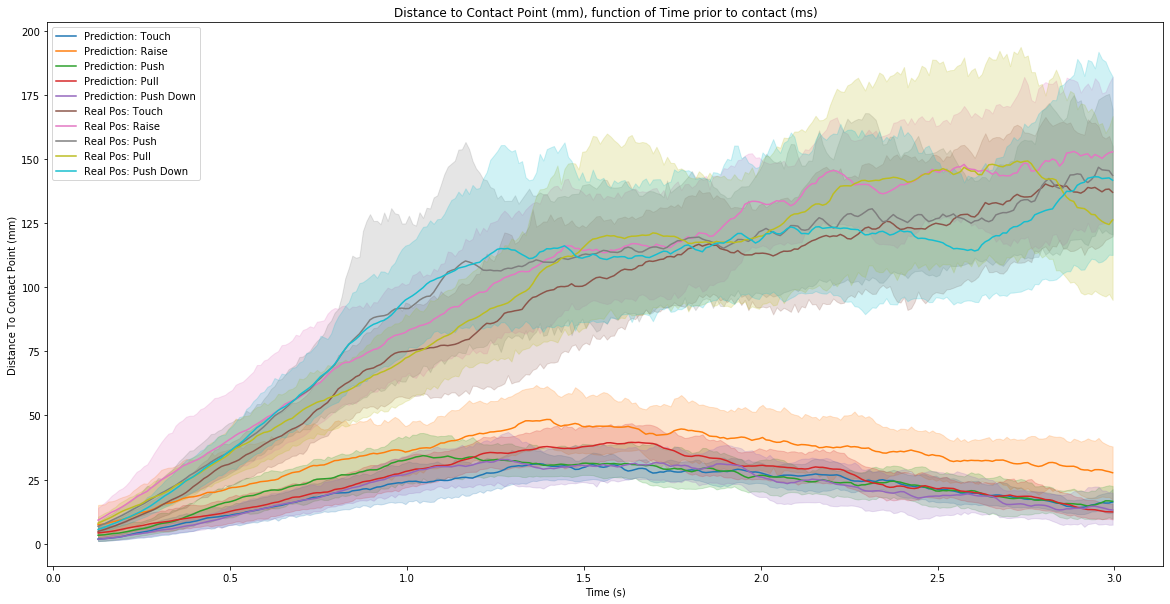

In [33]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Touch', data = checkmeout, label = 'Prediction: Touch')#, palette="flare")
alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Raise', data = checkmeout, label = 'Prediction: Raise')
alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Push', data = checkmeout, label = 'Prediction: Push')
alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Pull', data = checkmeout, label = 'Prediction: Pull')
alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Push Down', data = checkmeout, label = 'Prediction: Push Down')

alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Touch', data = checkmeoutBone, label = 'Real Pos: Touch')
alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Raise', data = checkmeoutBone, label = 'Real Pos: Raise')
alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Push', data = checkmeoutBone, label = 'Real Pos: Push')
alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Pull', data = checkmeoutBone, label = 'Real Pos: Pull')
alphaplot = sns.lineplot(x = 'Tolerance_', y = 'Push Down', data = checkmeoutBone, label = 'Real Pos: Push Down')

plt.title('Distance to Contact Point (mm), function of Time prior to contact (ms)')
#alphaplot = sns.lineplot(x = speedTol.index, y = 'AbsSpeed', data = speedTol, label = 'MeanSpeed')
plt.ylabel('Distance To Contact Point (mm)')
plt.xlabel('Time (s)')
plt.savefig('./IndexThumb-Tasks-Predict-RealPos.pdf')


In [34]:
roll = 10
checkmeoutS = pd.DataFrame()
for user in range(0, nbUsers):
    checkmeoutBS = pd.DataFrame()
    checkmeoutBS = analysisPerScale[analysisPerScale['User'] == list_names[user]]#.rolling(roll).mean()
    
    del checkmeoutBS['User']
    checkmeoutBS = checkmeoutBS.rolling(roll).mean()
    
    checkmeoutBS['User'] = list_names[user]
    checkmeoutS = pd.concat([checkmeoutS, checkmeoutBS], axis = 0, sort = True)
    
    
checkmeoutBoneS = pd.DataFrame()
for user in range(0, nbUsers):
    checkmeoutBoneBS = pd.DataFrame()
    checkmeoutBoneBS = analysisBoneDistPerScale[analysisBoneDistPerScale['User'] == list_names[user]]#.rolling(roll).mean()
    
    del checkmeoutBoneBS['User']
    checkmeoutBoneBS = checkmeoutBoneBS.rolling(roll).mean()
    
    checkmeoutBoneBS['User'] = list_names[user]
    checkmeoutBoneS = pd.concat([checkmeoutBoneS, checkmeoutBoneBS], axis = 0, sort = True)


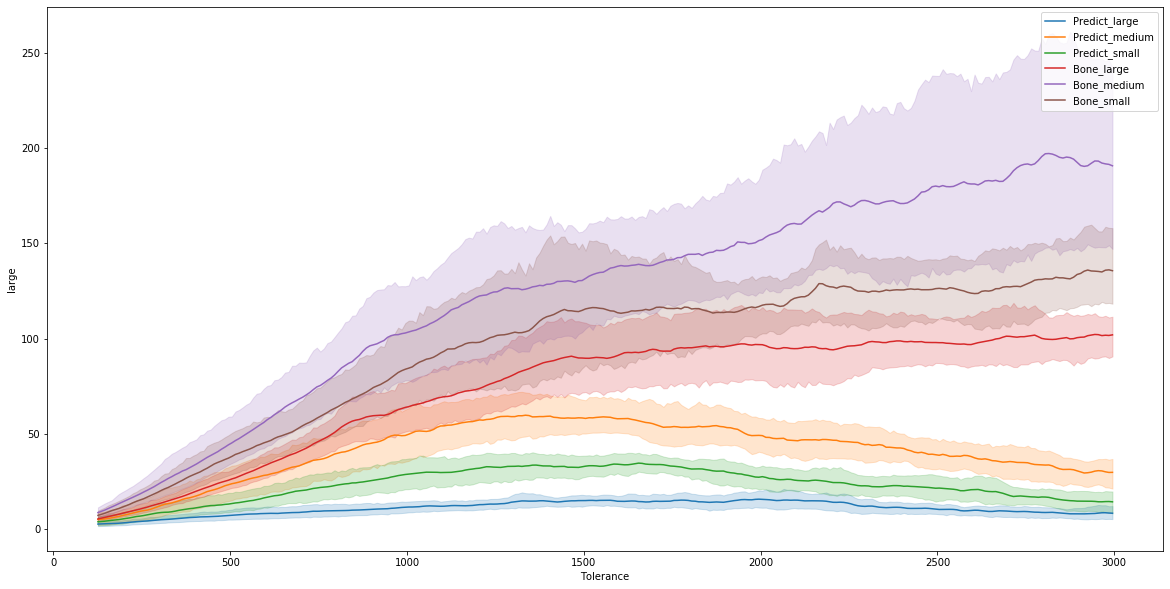

In [35]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = checkmeoutS, label = 'Predict_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = checkmeoutS, label = 'Predict_medium')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = checkmeoutS, label = 'Predict_small')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = checkmeoutBoneS, label = 'Bone_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = checkmeoutBoneS, label = 'Bone_medium')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = checkmeoutBoneS, label = 'Bone_small')

In [36]:
roll = 10
checkmeoutO = pd.DataFrame()
for user in range(0, nbUsers):
    checkmeoutBO = pd.DataFrame()
    checkmeoutBO = analysisPerObj[analysisPerObj['User'] == list_names[user]]#.rolling(roll).mean()
    
    del checkmeoutBO['User']
    checkmeoutBO = checkmeoutBO.rolling(roll).mean()
    
    checkmeoutBO['User'] = list_names[user]
    checkmeoutO = pd.concat([checkmeoutO, checkmeoutBO], axis = 0, sort = True)
    
    
checkmeoutBoneO = pd.DataFrame()
for user in range(0, nbUsers):
    checkmeoutBoneBO = pd.DataFrame()
    checkmeoutBoneBO = analysisBoneDistPerObj[analysisBoneDistPerObj['User'] == list_names[user]]#.rolling(roll).mean()
    
    del checkmeoutBoneBO['User']
    checkmeoutBoneBO = checkmeoutBoneBO.rolling(roll).mean()
    
    checkmeoutBoneBO['User'] = list_names[user]
    checkmeoutBoneO = pd.concat([checkmeoutBoneO, checkmeoutBoneBO], axis = 0, sort = True)


In [37]:
checkmeoutBoneO.columns

Index(['Beta', 'Cube', 'Cylinder', 'Gamma', 'Tolerance', 'User', 'obj0',
       'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


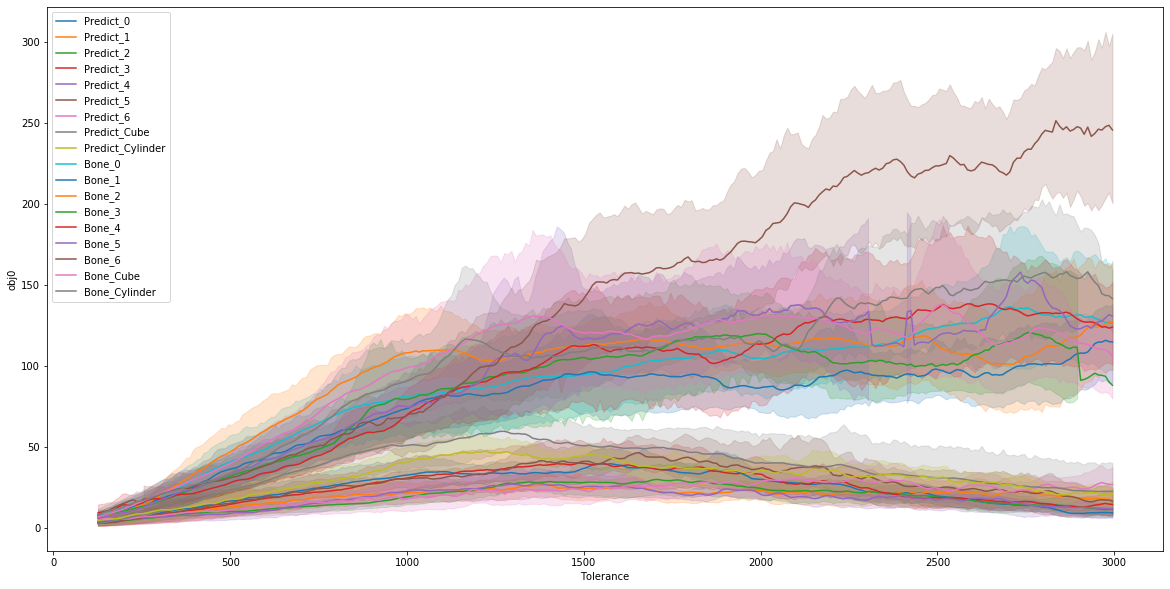

In [38]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj0', data = checkmeoutO, label = 'Predict_0')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj1', data = checkmeoutO, label = 'Predict_1')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj2', data = checkmeoutO, label = 'Predict_2')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj3', data = checkmeoutO, label = 'Predict_3')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj4', data = checkmeoutO, label = 'Predict_4')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj5', data = checkmeoutO, label = 'Predict_5')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj6', data = checkmeoutO, label = 'Predict_6')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Cube', data = checkmeoutO, label = 'Predict_Cube')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Cylinder', data = checkmeoutO, label = 'Predict_Cylinder')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj0', data = checkmeoutBoneO, label = 'Bone_0')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj1', data = checkmeoutBoneO, label = 'Bone_1')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj2', data = checkmeoutBoneO, label = 'Bone_2')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj3', data = checkmeoutBoneO, label = 'Bone_3')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj4', data = checkmeoutBoneO, label = 'Bone_4')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj5', data = checkmeoutBoneO, label = 'Bone_5')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'obj6', data = checkmeoutBoneO, label = 'Bone_6')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Cube', data = checkmeoutBoneO, label = 'Bone_Cube')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Cylinder', data = checkmeoutBoneO, label = 'Bone_Cylinder')



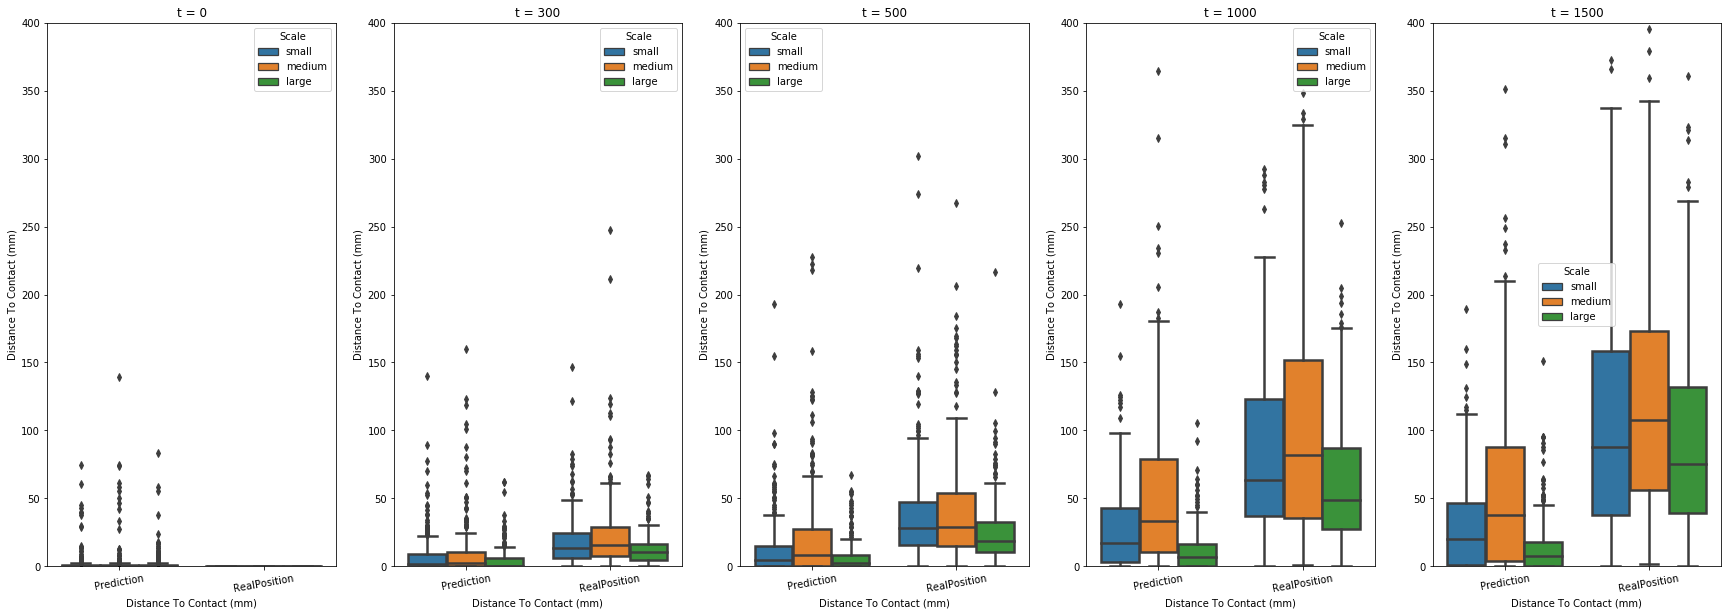

In [39]:
nameAx = []
nameFig = []
#tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 2000]
#lim = [50, 150, 300, 300, 300, 300, 400, 400, 400, 500, 500, 500]
tolTime = [0, 300, 500, 1000, 1500]
lim = [50, 150, 300, 500, 600]#, 300, 300, 400, 400, 400, 500, 500, 500]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):

    mdf = pd.DataFrame()
    cdf = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1 = pd.DataFrame(allConfig['DistInTolTime.'+str(tolTime[i])]).assign(Trial=1)
    df1['Scale'] = allConfig['Scale']
    df2 = pd.DataFrame(allConfig['DistBoneInTolTime.'+str(tolTime[i])]).assign(Trial=2)
    df2['DistInTolTime.'+str(tolTime[i])] = allConfig['DistBoneInTolTime.'+str(tolTime[i])]
    df2['Scale'] = allConfig['Scale']
    df2.assign(Trial=2)
    cdf = pd.concat([df1, df2], sort = False)                                # CONCATENATE
    mdf = pd.melt(cdf, id_vars=['Trial','Scale'],value_vars='DistInTolTime.'+str(tolTime[i]), var_name = 'DistInTolTime.'+str(tolTime[i]))

    nameFig[i] = sns.boxplot(x="Trial", y="value", hue = 'Scale', data=mdf, linewidth = 2.5, ax = nameAx[i])  # RUN PLOT   
    #nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[i].set_ylabel('Distance To Contact (mm)')
    nameFig[i].set_xlabel('Distance To Contact (mm)')#, t ='+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    #nameFig[i].set_ylim(0, lim[i])
    
for ax in nameFig:
    tl = ['Prediction', 'RealPosition']#ax.get_xticklabels()#['Prediction/Contact', 'RealPosition/Contact'])
    ax.set_xticklabels(tl, rotation=10)
    ax.set_ylim(0, 400)

plt.savefig('./IndexThumb-ScaleBoxplot-Predict-RealPos.pdf')


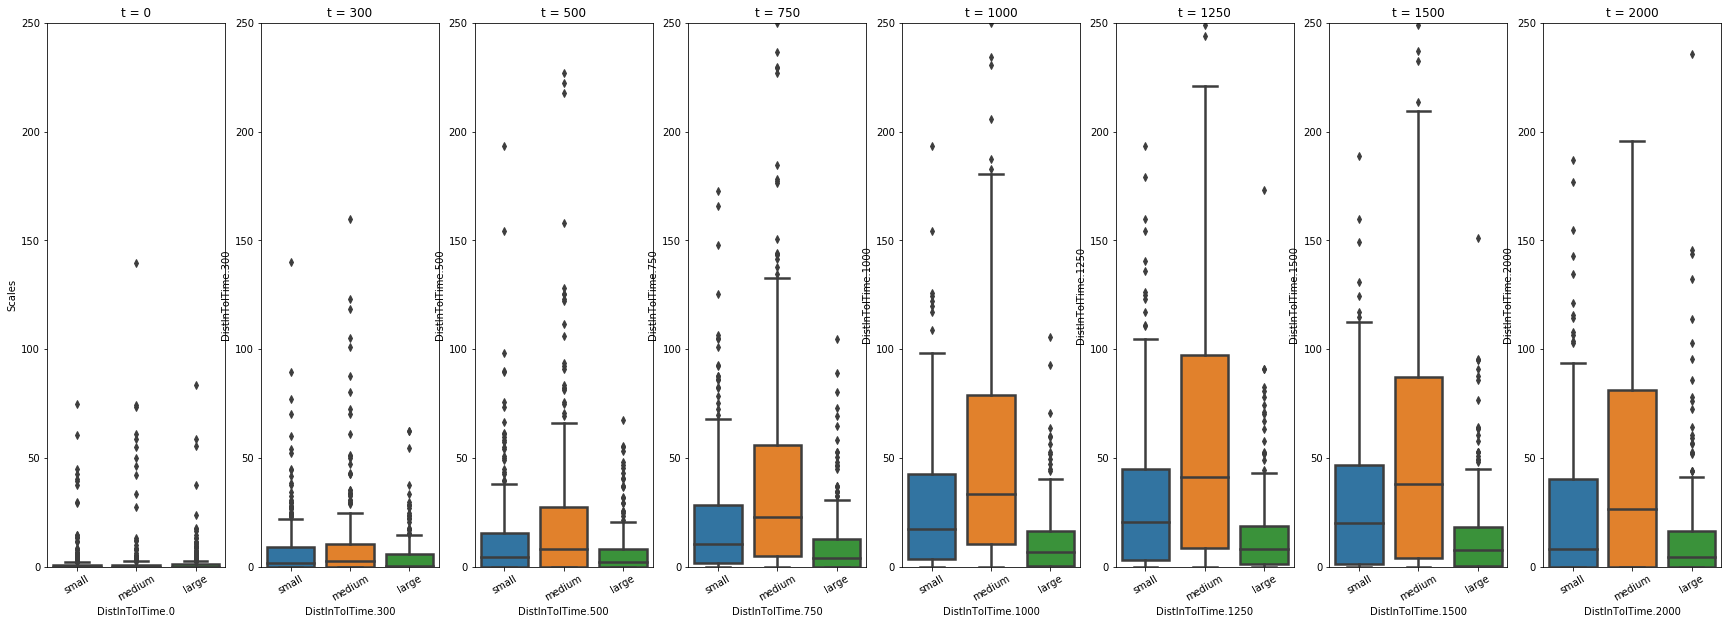

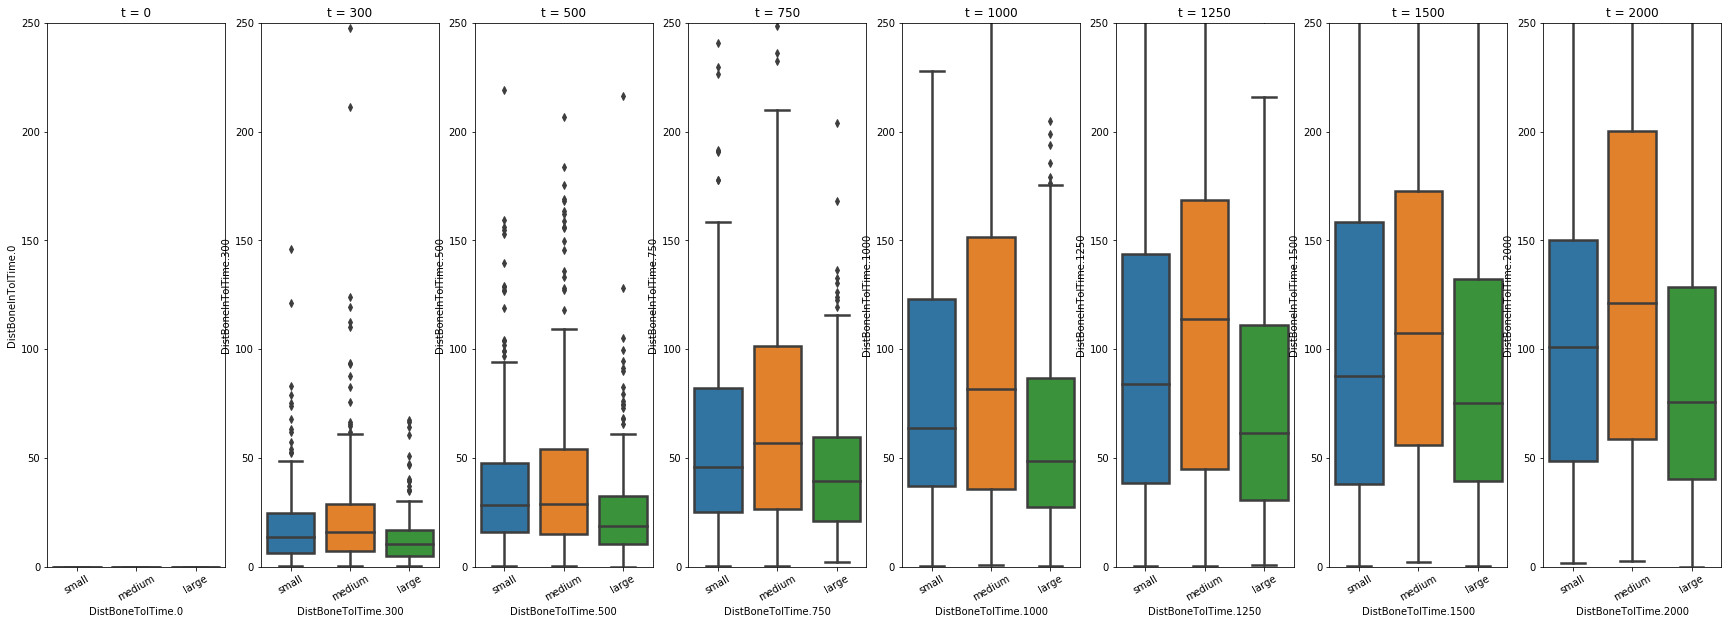

In [40]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    #nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistBoneTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


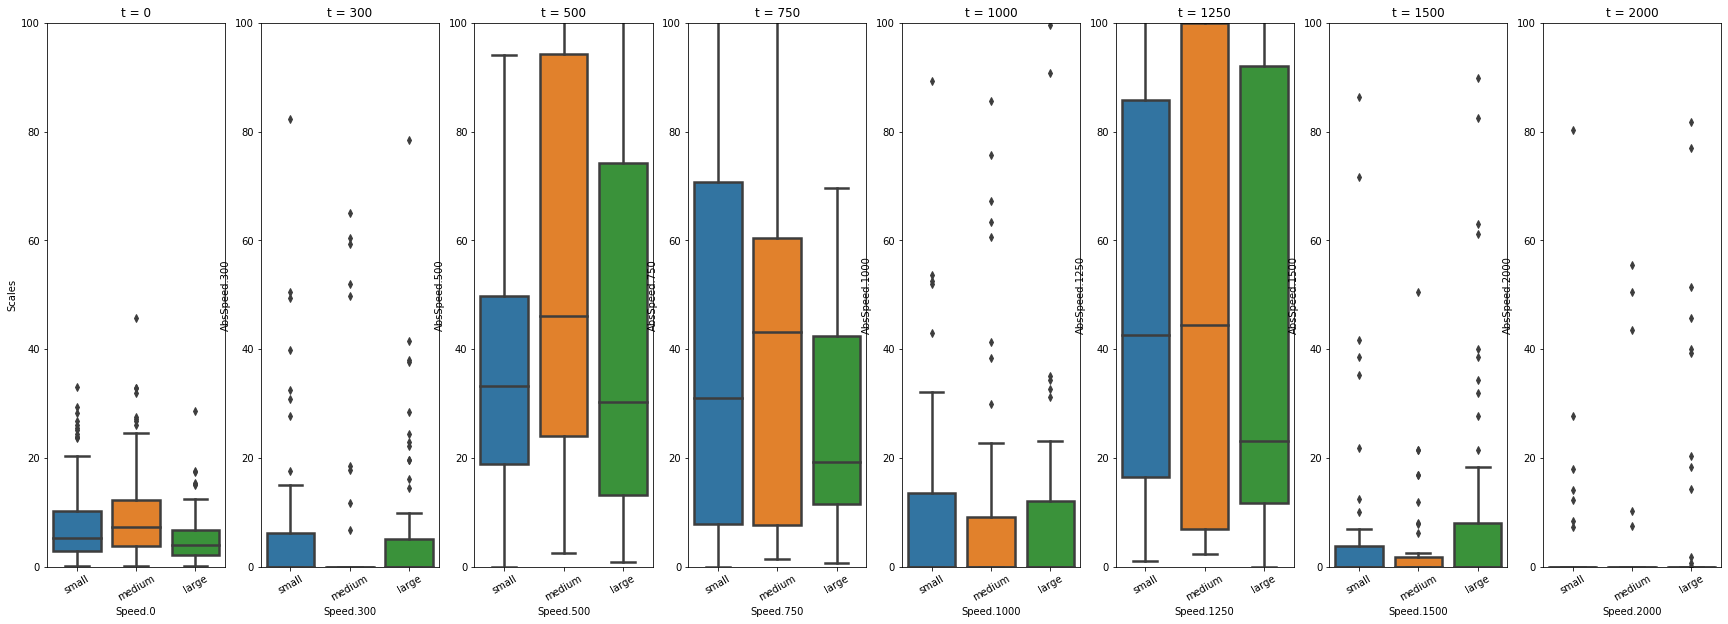

In [41]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
    #nameFig[i] = sns.lineplot(x = i, y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    
    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('Speed.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 100)

    

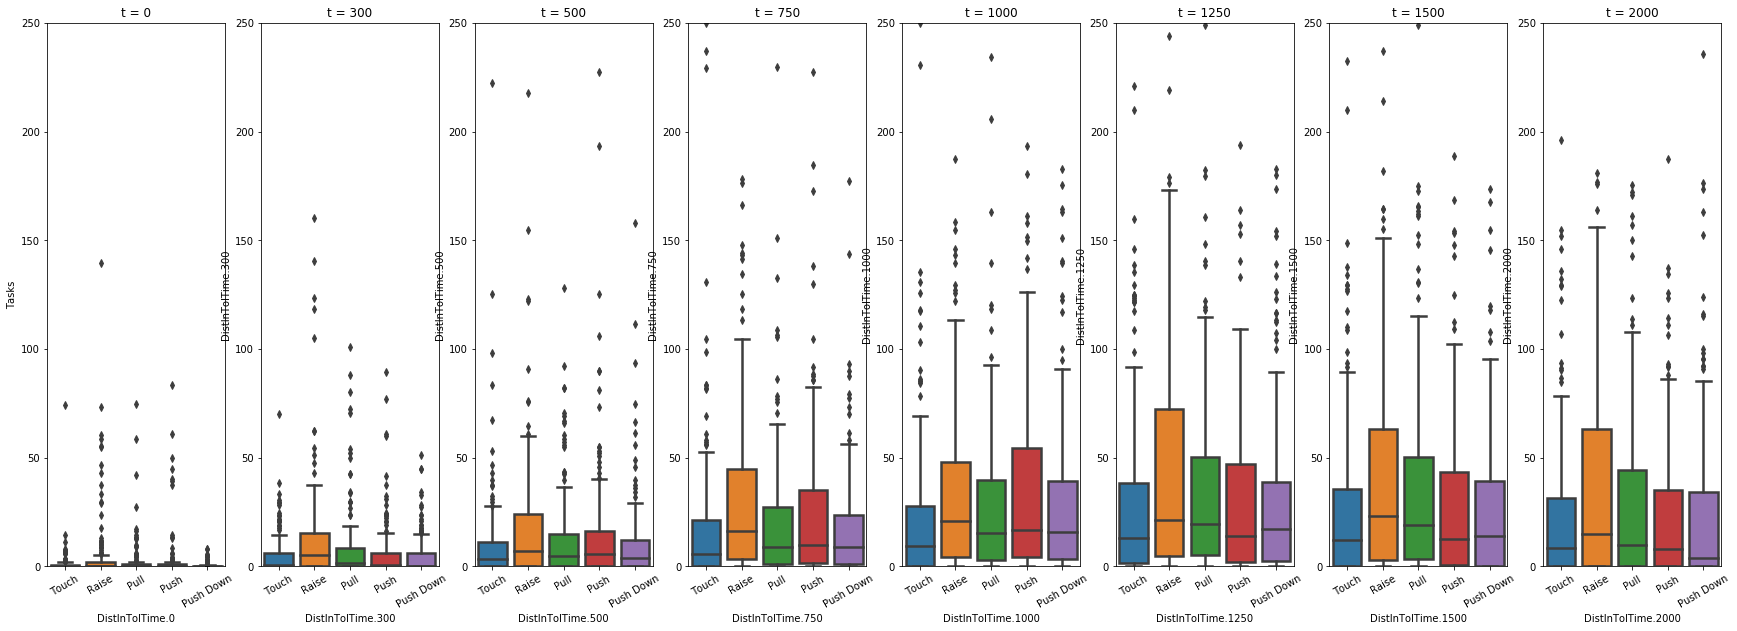

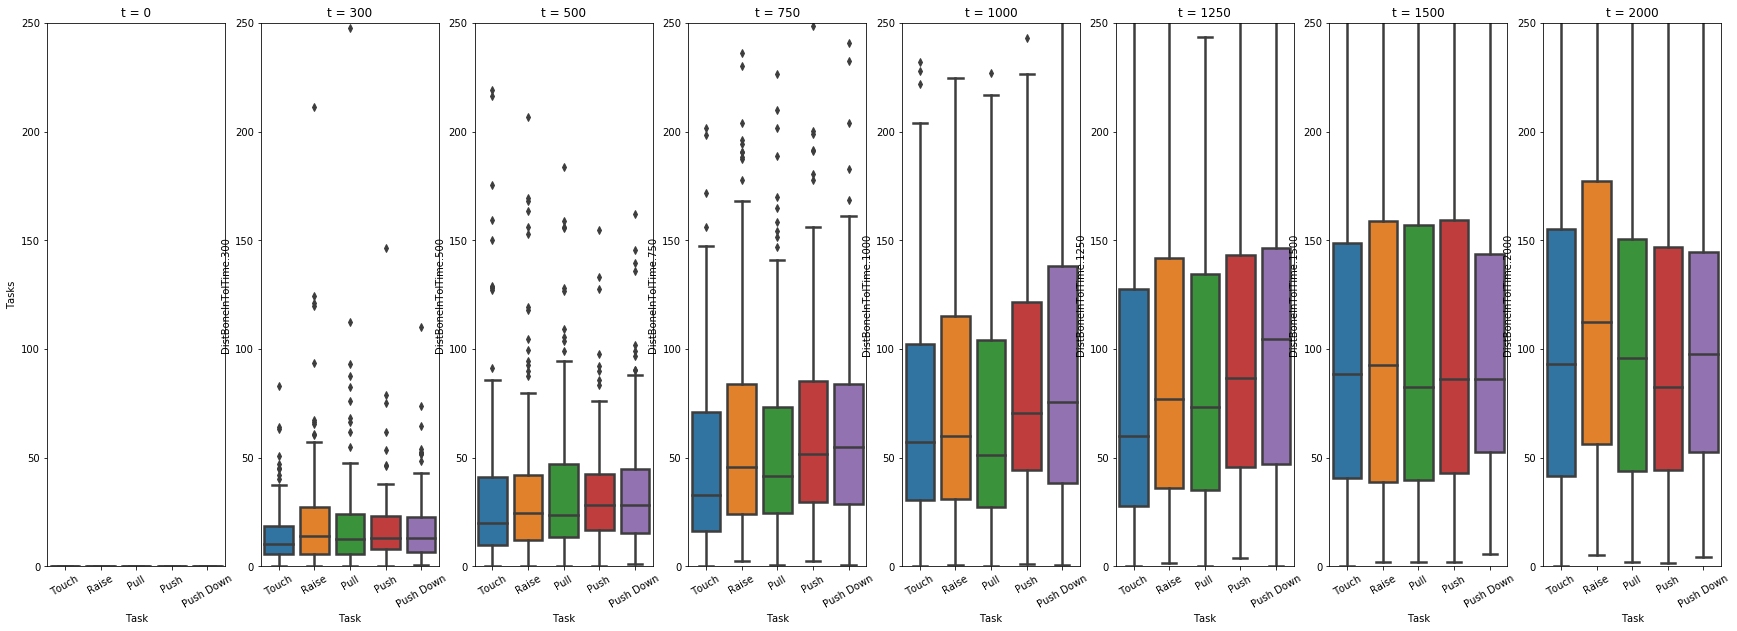

In [42]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [43]:
allConfig['Obj'].iloc[77], allConfig['Scale'].iloc[77], allConfig['Task'].iloc[77]

('Cylinder', 'medium', 'Touch')

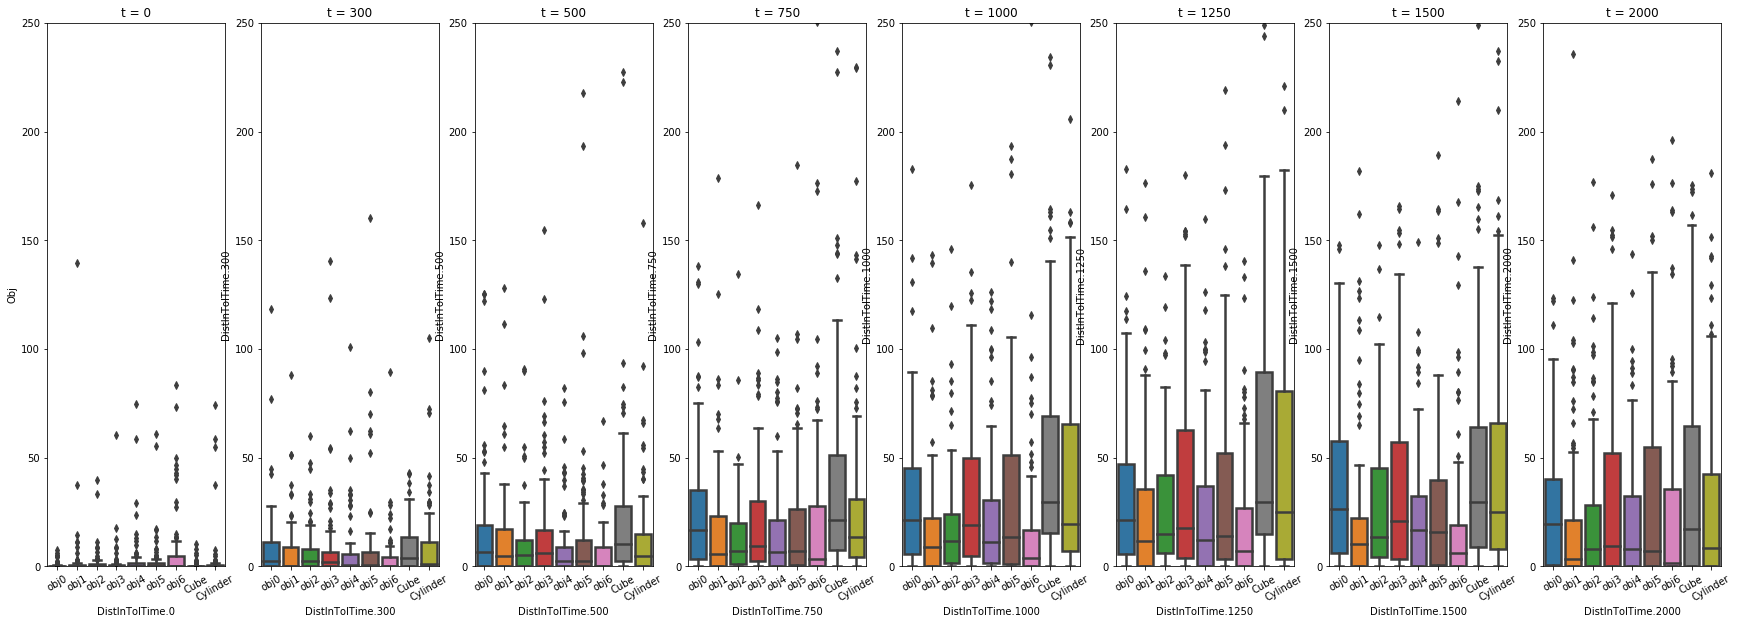

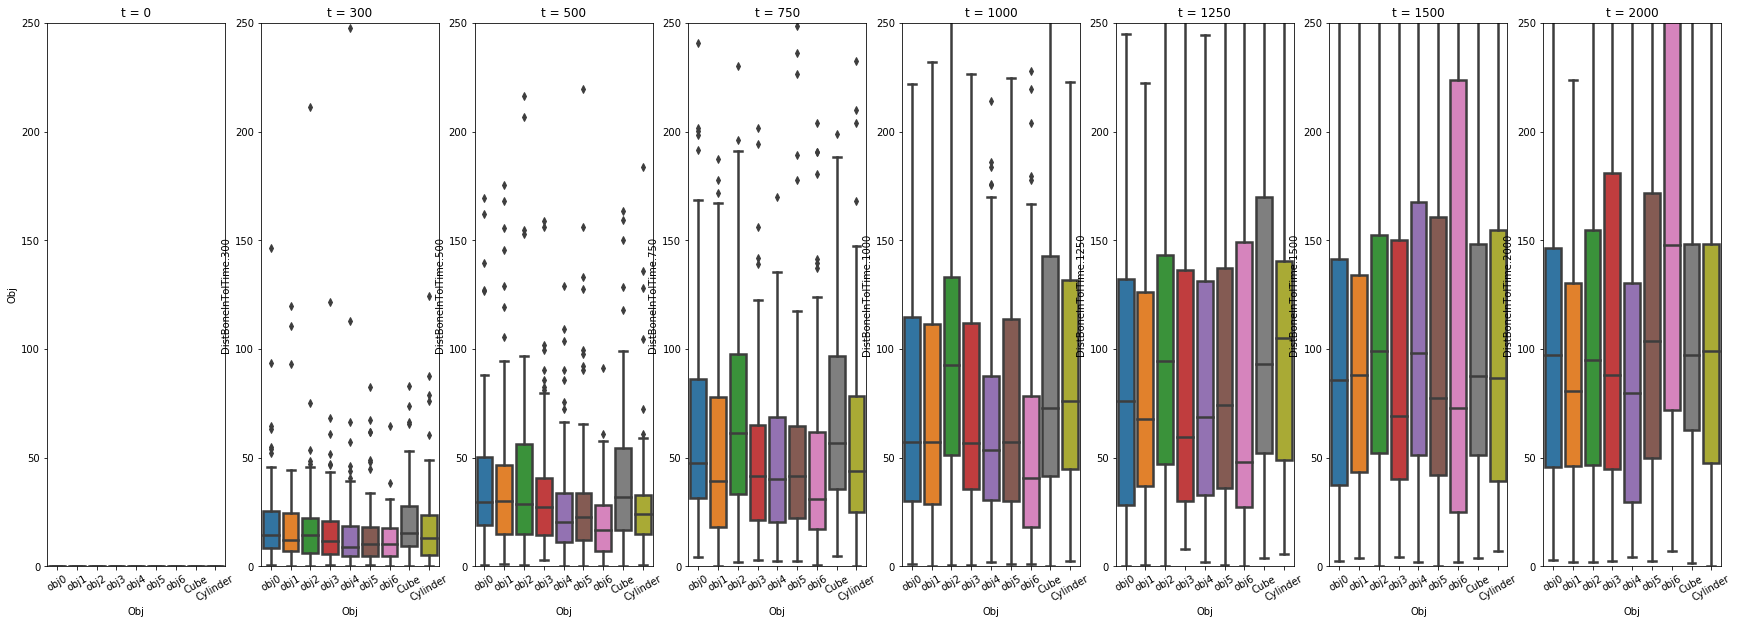

In [44]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [45]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])   & (allConfig['Task'] == 'Touch')          
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers

In [46]:
taskObj

Touch      Raise       Pull       Push  Push Down
obj0      5.070858  14.979101   6.670479   6.966141   9.167089
obj1      4.663150   8.901369   6.831288   6.012958   5.869510
obj2      6.051502   9.292020   3.063545  11.487774   4.681146
obj3      3.003816  21.714253   7.408083   3.991430   4.166812
obj4      2.058289  12.466102  10.358919   3.455989   3.192666
obj5      6.550442  16.793451   9.063934   4.924721   2.778818
obj6      2.378904   3.164328   4.047550   7.133864   2.205979
Cube      9.147191  11.662164   9.469671   3.285191   8.857783
Cylinder  4.711088  22.175111  15.488618   6.259836   4.310971

In [47]:
taskScale

Touch  Raise  Pull  Push  Push Down
small   5.886818    NaN   NaN   NaN        NaN
medium  4.528515    NaN   NaN   NaN        NaN
large   3.991913    NaN   NaN   NaN        NaN

In [48]:
scaleObj

obj0       obj1      obj2       obj3      obj4       obj5  \
small    9.410004   5.041755  6.842514   9.011405  4.658898   8.373981   
medium  12.007863  10.465116  7.676190  11.457328  8.775237  11.902008   
large    3.454867   3.729562  6.101880   4.075416  5.260366   3.610673   

            obj6       Cube   Cylinder  
small   7.556841  11.381367   7.095202  
medium  0.964073  10.598110  14.532527  
large   3.091846   4.765420   5.245417

In [49]:
taskScale = pd.DataFrame()

tol = 1250
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers

In [50]:
scaleObj
taskScale

Touch      Raise       Pull       Push  Push Down
small   28.577313  41.638722  34.358619  30.207386  26.711218
medium  53.030604  69.856411  63.067289  46.337669  61.508000
large    9.977302  22.192447  12.176925  14.339300  12.049425

In [51]:
who = 56

allConfig[allConfig.index == who]['Obj'], allConfig[allConfig.index == who]['Task'], allConfig[allConfig.index == who]['Scale']

(56    obj3
 56    obj6
 56    obj2
 56    obj2
 56    obj4
 56    obj4
 56    obj3
 Name: Obj, dtype: object, 56    Raise
 56     Push
 56    Raise
 56     Push
 56    Touch
 56    Touch
 56    Touch
 Name: Task, dtype: object, 56    medium
 56    medium
 56    medium
 56    medium
 56    medium
 56    medium
 56    medium
 Name: Scale, dtype: object)

# Scales and Tasks

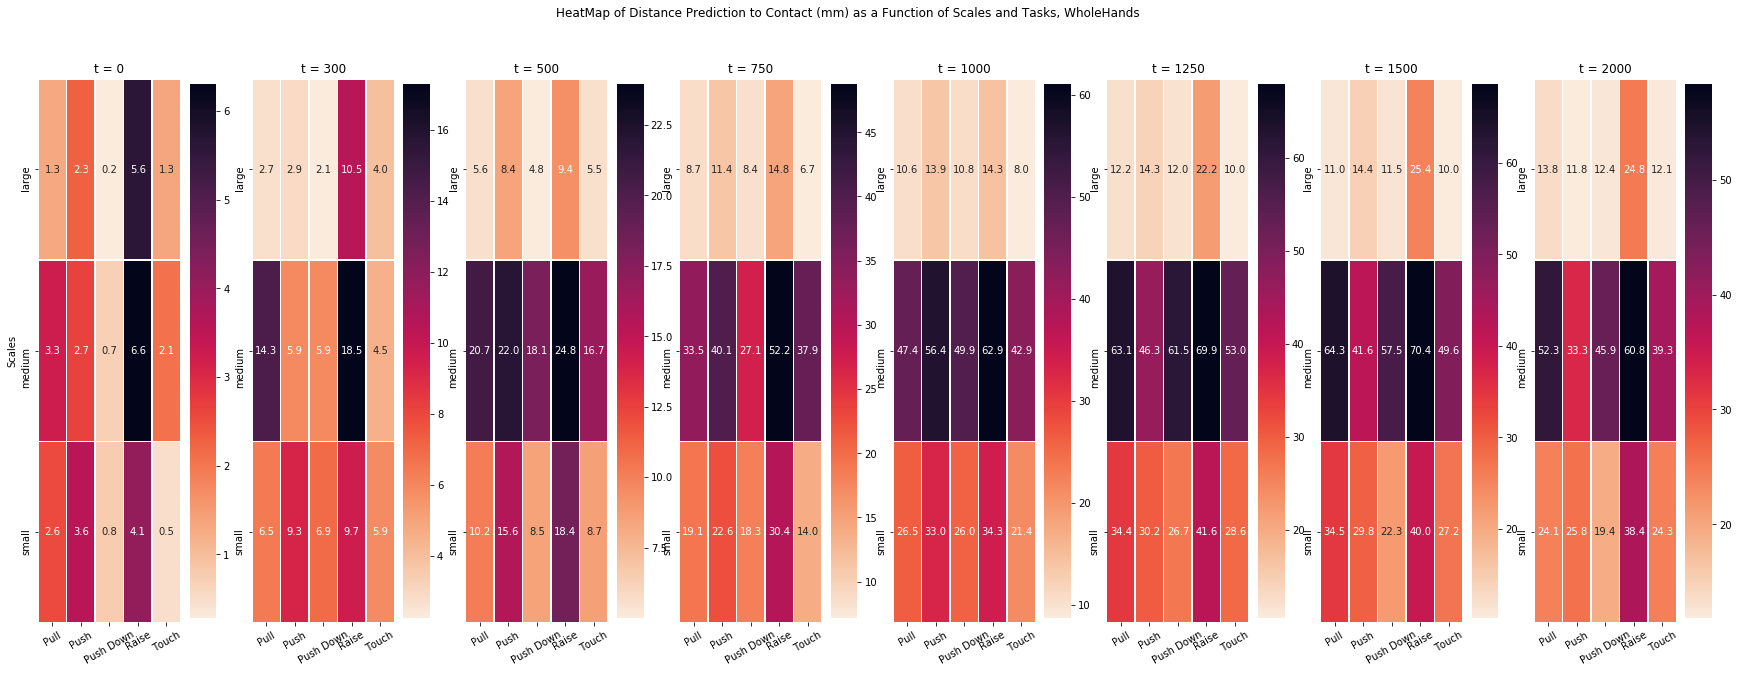

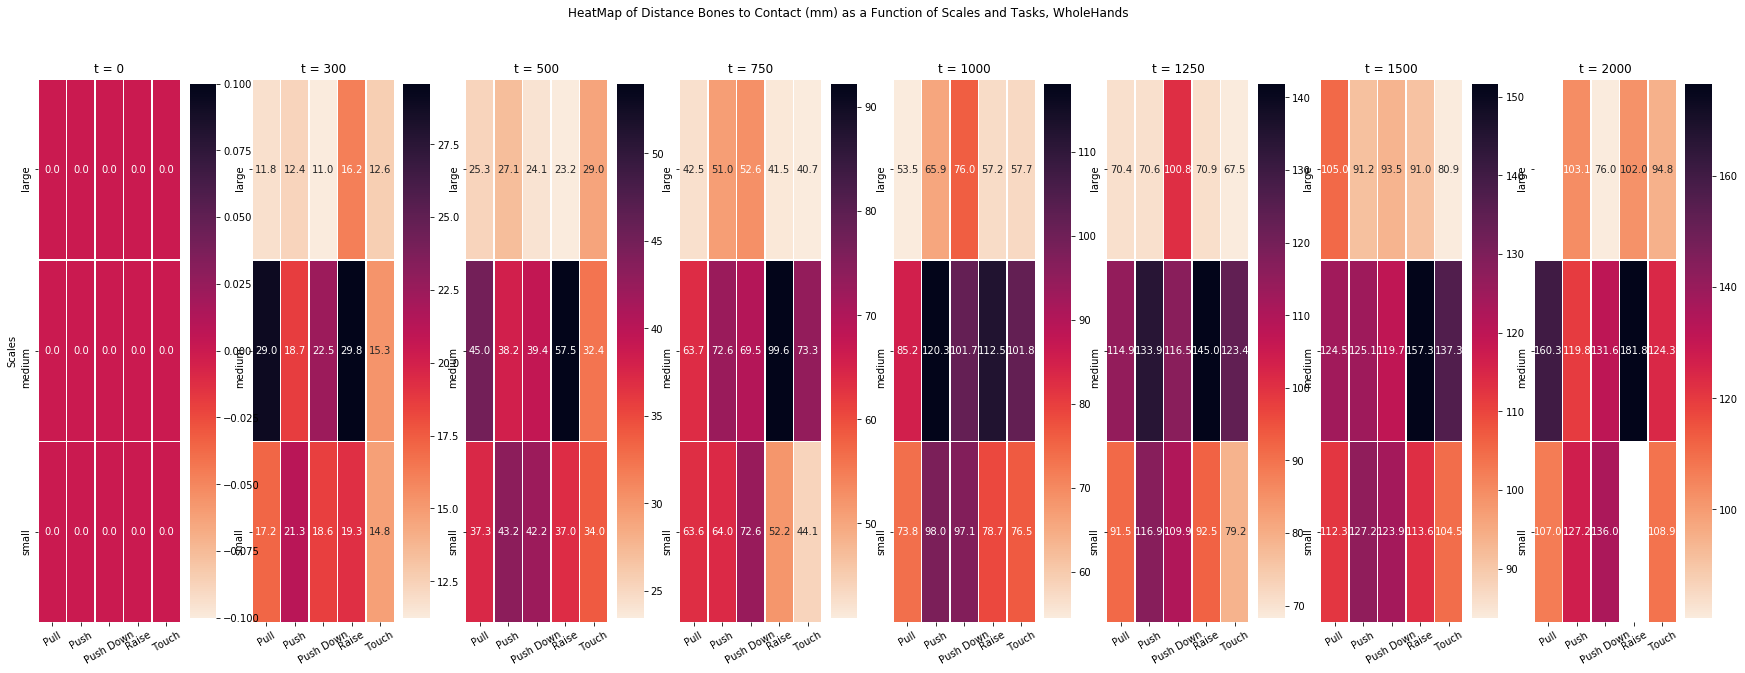

In [52]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, WholeHands')

plt.show()

In [53]:

tol = 300
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == 'obj6') & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)]
            

# Scales and Objects

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


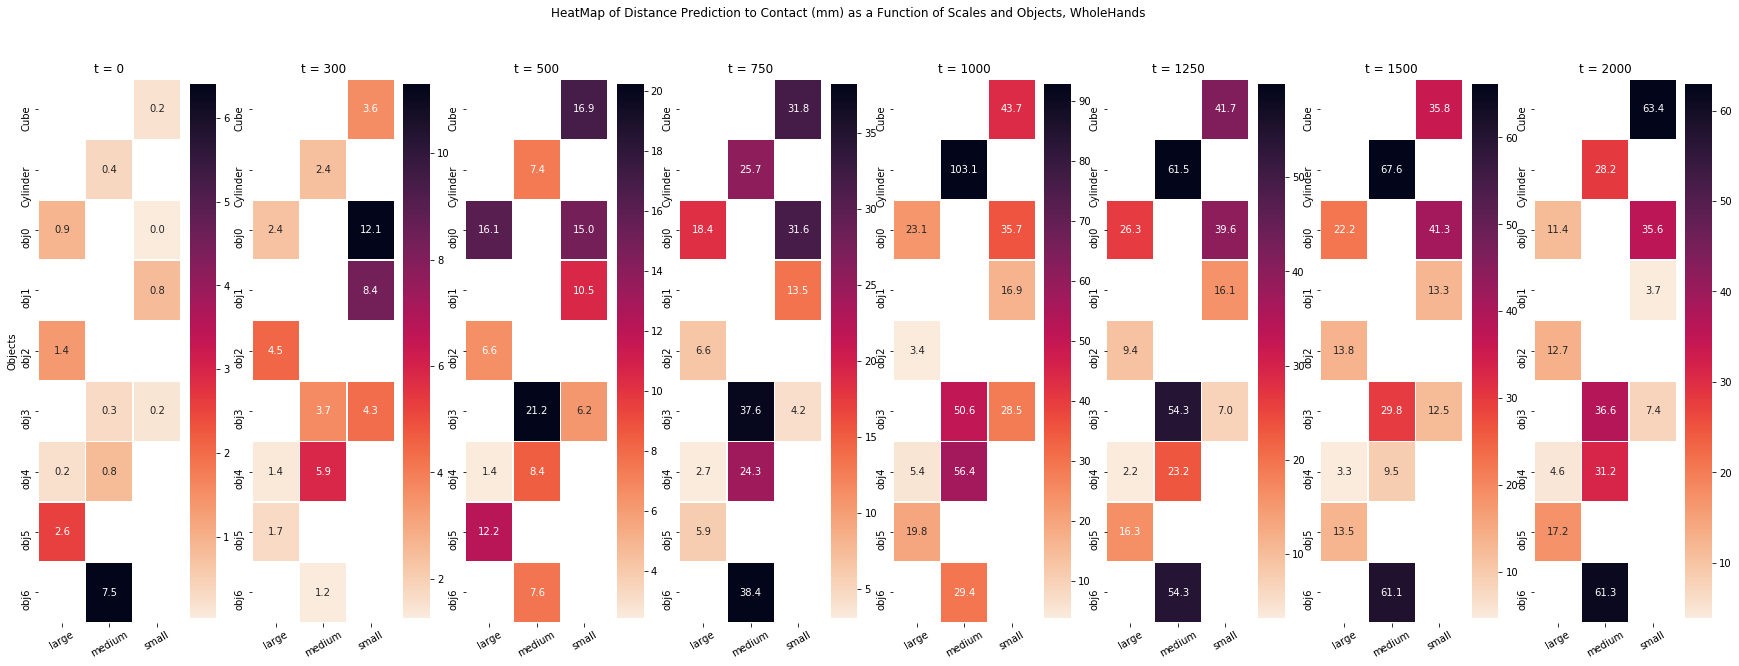

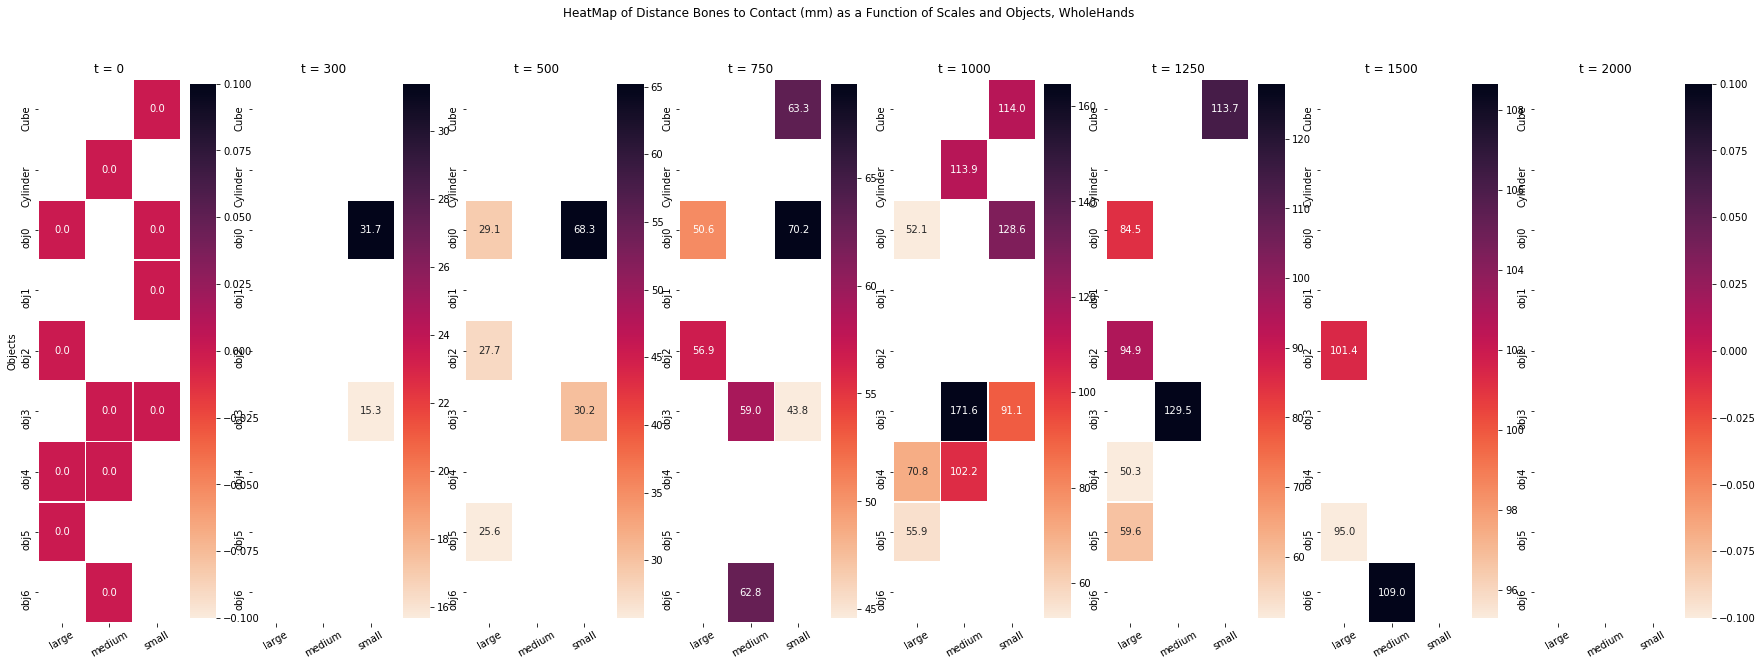

In [54]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users]) & (allConfig['Task'] == 'Push')            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers        
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users]) & (allConfig['Task'] == 'Push')           
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Objects, WholeHands')

plt.show()

# Tasks and Objects

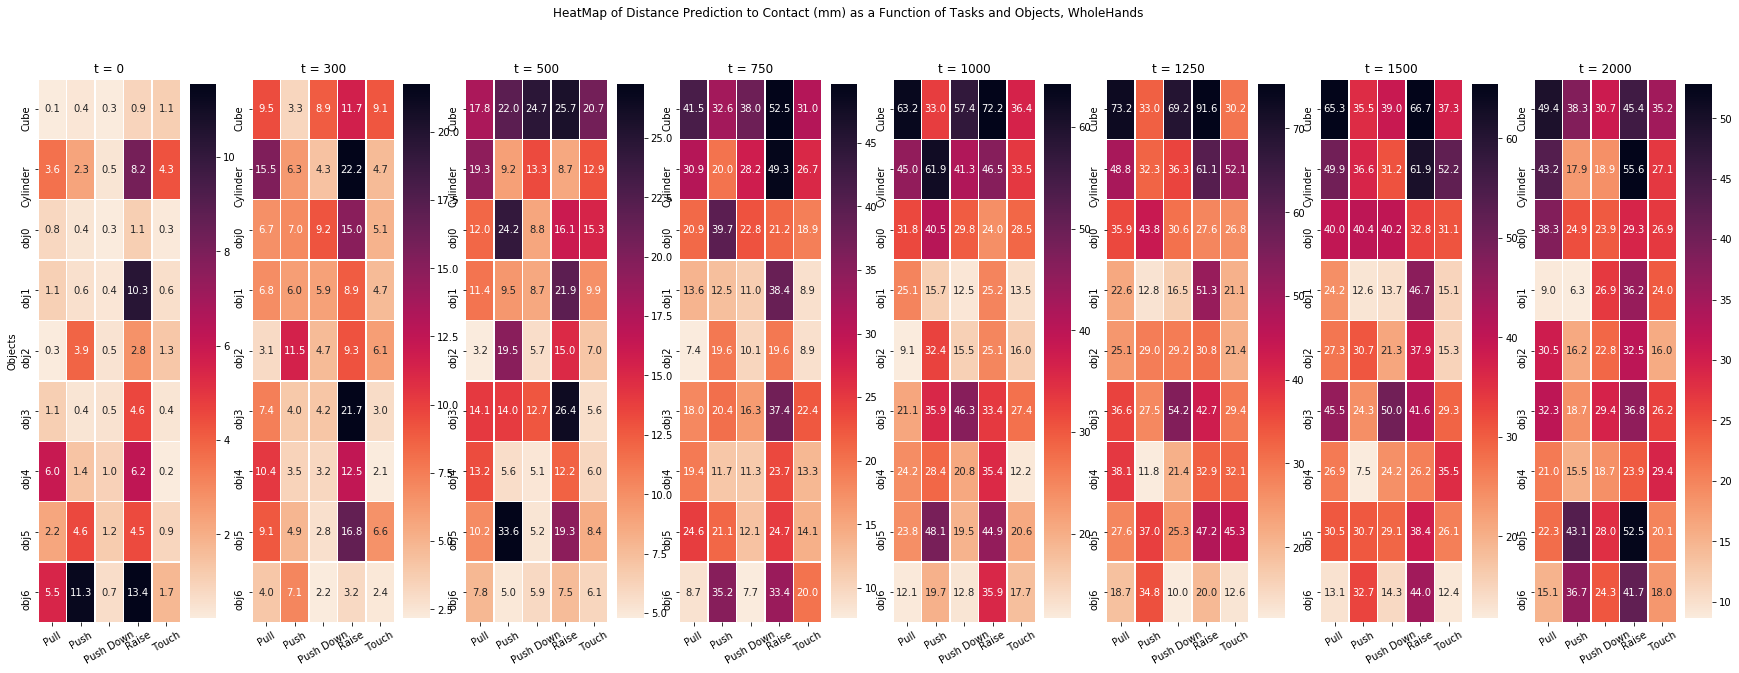

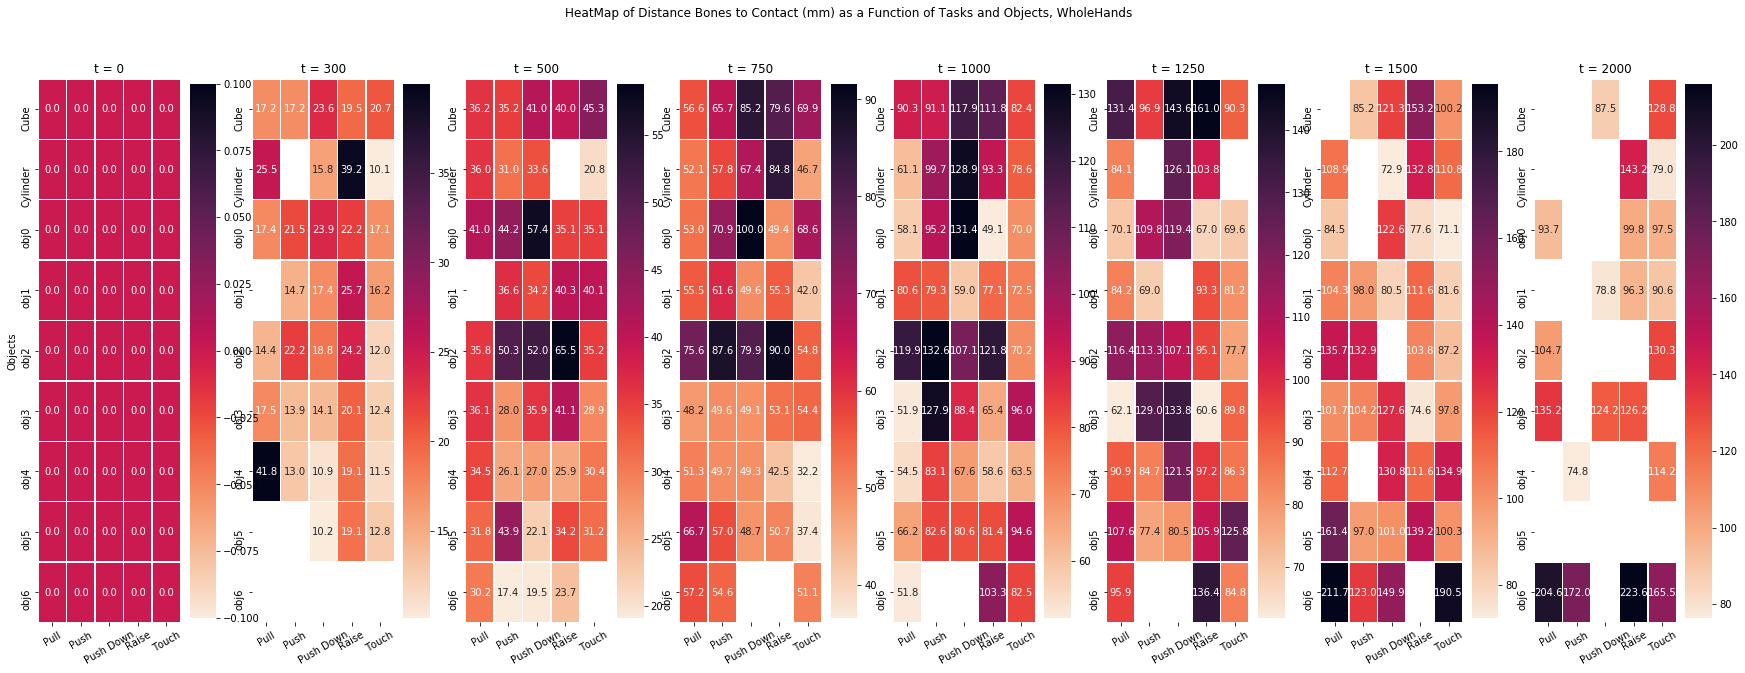

In [55]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Tasks and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Tasks and Objects, WholeHands')

plt.show()

In [56]:
allConfig['DistInTolTime.'+str(0)].mean(), allConfig['DistInTolTime.'+str(0)].std()

(2.522128155294119, 9.958535370878641)

In [57]:
allConfig['DistInTolTime.'+str(300)].mean(), allConfig['DistInTolTime.'+str(300)].std()

(7.444871990588236, 15.706693461063317)

In [58]:
allConfig['DistInTolTime.'+str(600)].mean(), allConfig['DistInTolTime.'+str(600)].std()

(16.57927948117647, 28.40727942275629)

In [59]:
allConfig['DistInTolTime.'+str(1200)].mean(), allConfig['DistInTolTime.'+str(1200)].std()

(33.197521447647055, 46.57940730053939)

In [60]:
allConfig['DistInTolTime.'+str(1800)].mean(), allConfig['DistInTolTime.'+str(1800)].std()

(34.890364819411765, 52.42088746967137)

In [61]:
allConfig['DistInTolTime.'+str(2400)].mean(), allConfig['DistInTolTime.'+str(2400)].std()

(23.19500955235294, 43.88624293700795)

In [62]:
allConfig['DistBoneInTolTime.'+str(0)].mean(), allConfig['DistBoneInTolTime.'+str(0)].std()

(0.0, 0.0)

In [63]:
allConfig['DistBoneInTolTime.'+str(300)].mean(), allConfig['DistBoneInTolTime.'+str(300)].std()

(18.251428551336147, 21.40836158399989)

In [64]:
allConfig['DistBoneInTolTime.'+str(600)].mean(), allConfig['DistBoneInTolTime.'+str(600)].std()

(45.09212994764398, 43.01496707106243)

In [65]:
allConfig['DistBoneInTolTime.'+str(1200)].mean(), allConfig['DistBoneInTolTime.'+str(1200)].std()

(99.17554667758846, 91.30766220328812)

In [66]:
allConfig['DistBoneInTolTime.'+str(1800)].mean(), allConfig['DistBoneInTolTime.'+str(1800)].std()

(114.20815822458269, 87.57699763933726)

In [67]:
allConfig['DistBoneInTolTime.'+str(2400)].mean(), allConfig['DistBoneInTolTime.'+str(2400)].std()

(121.35480579185521, 94.87995793019496)

In [68]:
meanUsers.head()

Beta  BoneDist.6  BoneDist.9  Gamma  Phalanx.6  Phalanx.9  \
2580  1.05  123.486648  141.442734    0.0  24.054179  18.558197   
2570  1.05  123.767080  138.041744    0.0  25.715584  19.443839   
2560  1.05  129.597154  141.647252    0.0  25.628388  20.668474   
2550  1.05  124.821874  139.286265    0.0  26.167948  19.880196   
2540  1.05  131.576441  144.413420    0.0  25.407317  18.773877   

      STDBoneDist.6  STDBoneDist.9  STDPhalanx.6  STDPhalanx.9    Speed.6  \
2580      24.008933      40.542520      7.672328      7.683211   8.175861   
2570      23.402454      37.845085      7.978118      6.621249   7.485026   
2560      28.629766      38.605966      8.640390      6.696421  33.265965   
2550      22.182111      35.737082      9.339359      6.319306   6.116862   
2540      36.941538      37.985116      8.973879      6.239159   9.448139   

        Speed.9  
2580  37.997788  
2570   0.794373  
2560  27.968647  
2550   5.133701  
2540  18.060091

In [69]:
meanUsers['STDBoneDist.6'].loc[300], meanUsers['BoneDist.6'].loc[300]

(6.995858285535391, 16.037172150145427)

In [70]:
tol = [0, 300, 600, 1200, 1800, 2400]

writeMe = pd.DataFrame()
for i in range(0, len(tol)):
    writeMe.loc[tol[i], 'Phalanx.6'] = meanUsers['Phalanx.6'].loc[tol[i]]
    writeMe.loc[tol[i], 'Phalanx.9'] = meanUsers['Phalanx.9'].loc[tol[i]]
    writeMe.loc[tol[i], 'PhalanxSTD.6'] = meanUsers['STDPhalanx.6'].loc[tol[i]]
    writeMe.loc[tol[i], 'PhalanxSTD.9'] = meanUsers['STDPhalanx.9'].loc[tol[i]]

    writeMe.loc[tol[i], 'Combined'] = allConfig['DistInTolTime.'+str(tol[i])].mean()
    writeMe.loc[tol[i], 'CombinedSTD'] = allConfig['DistInTolTime.'+str(tol[i])].std()
    
    writeMe.loc[tol[i], 'BonePhalanx.6'] = meanUsers['BoneDist.6'].loc[tol[i]]
    writeMe.loc[tol[i], 'BonePhalanx.9'] = meanUsers['BoneDist.9'].loc[tol[i]]
    writeMe.loc[tol[i], 'BoneSTD.6'] = meanUsers['STDBoneDist.6'].loc[tol[i]]
    writeMe.loc[tol[i], 'BoneSTD.9'] = meanUsers['STDBoneDist.9'].loc[tol[i]]
    
    writeMe.loc[tol[i], 'CombinedBone'] = allConfig['DistBoneInTolTime.'+str(tol[i])].mean()
    writeMe.loc[tol[i], 'CombinedBoneSTD'] = allConfig['DistBoneInTolTime.'+str(tol[i])].std()
    
writeMe



Phalanx.6  Phalanx.9  PhalanxSTD.6  PhalanxSTD.9   Combined  \
0      2.558899   2.570340      2.551458      3.221988   2.522128   
300    6.548430   8.269247      5.736582      6.012924   7.444872   
600   14.935071  17.516026      9.907438      8.714837  16.579279   
1200  28.637545  36.827512     11.397024     11.185128  33.197521   
1800  33.208632  35.307687     10.526989     11.587337  34.890365   
2400  24.724699  20.417702      6.647914      7.967028  23.195010   

      CombinedSTD  BonePhalanx.6  BonePhalanx.9  BoneSTD.6  BoneSTD.9  \
0        9.958535       0.000000       0.000000   0.000000   0.000000   
300     15.706693      16.037172      20.207678   6.995858   9.641968   
600     28.407279      42.092442      45.764163  15.453477  18.150808   
1200    46.579407      88.116474     108.688858  36.992775  41.796197   
1800    52.420887     111.729744     123.543135  31.198293  33.955375   
2400    43.886243     114.735671     141.294271  22.849055  42.067676   

      CombinedBone  CombinedBoneSTD  
0         0.000000         0.000000  
300      18.251429        21.408362  
600      45.092130        43.014967  
1200     99.175547        91.307662  
1800    114.208158        87.576998  
2400    121.354806        94.879958

In [71]:
meanUsers['Phalanx.6'].loc[0], meanUsers['STDPhalanx.6'].loc[0]

(2.5588986485133383, 2.5514584350719036)

In [78]:
pd.concat([meanUsers['Phalanx.6'], meanUsers['Phalanx.9']], axis = 0, sort = True).loc[0].mean()

2.564619408927652

In [79]:
pd.concat([meanUsers['Phalanx.6'], meanUsers['Phalanx.9']], axis = 0, sort = True).loc[300].mean()

7.408838558948192